In [24]:
import pandas as pd
import os
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from datetime import datetime
from scipy.interpolate import make_interp_spline
import matplotlib.dates as mdates

# Download NLTK data if needed
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Define directories
cleaned_data_dir = "./Cleaned Data"
sentiment_dir = "./Sentiment Analysis CSV"

# Create directories if they don't exist
for directory in [cleaned_data_dir, sentiment_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")

### **1.0. CSV's to Data Frames**

In [2]:
# The Kingmaker - Complete
imdb_the_kingmaker = pd.read_csv("./Unclean Data/The Kingmaker/imdb_the_kingmaker.csv")
ltbx_earliest_the_kingmaker = pd.read_csv("./Unclean Data/The Kingmaker/ltbx_earliest_the_kingmaker.csv")
ltbx_latest_the_kingmaker = pd.read_csv("./Unclean Data/The Kingmaker/ltbx_latest_the_kingmaker.csv")
rt_the_kingmaker = pd.read_csv("./Unclean Data/The Kingmaker/rt_the_kingmaker.csv")

ltbx_the_kingmaker = pd.concat([ltbx_earliest_the_kingmaker, ltbx_latest_the_kingmaker])

print("The Kingmaker:")
print(f"imdb_the_kingmaker: {imdb_the_kingmaker.shape}")
print(f"ltbx_earliest_the_kingmaker: {ltbx_earliest_the_kingmaker.shape}")
print(f"ltbx_latest_the_kingmaker: {ltbx_latest_the_kingmaker.shape}")
print(f"rt_the_kingmaker: {rt_the_kingmaker.shape}")
print(f"ltbx_the_kingmaker: {ltbx_the_kingmaker.shape}")

# Praybeyt Benjamin 2 - No RT
imdb_praybeyt_benjamin_2 = pd.read_csv("./Unclean Data/Praybeyt Benjamin 2/imdb_praybeyt_benjamin_2.csv")
ltbx_earliest_praybeyt_benjamin_2 = pd.read_csv("./Unclean Data/Praybeyt Benjamin 2/ltbx_earliest_praybeyt_benjamin_2.csv")
ltbx_latest_praybeyt_benjamin_2 = pd.read_csv("./Unclean Data/Praybeyt Benjamin 2/ltbx_latest_praybeyt_benjamin_2.csv")

ltbx_praybeyt_benjamin_2 = pd.concat([ltbx_earliest_praybeyt_benjamin_2, ltbx_latest_praybeyt_benjamin_2])

print("\nPraybeyt Benjamin 2:")
print(f"imdb_praybeyt_benjamin_2: {imdb_praybeyt_benjamin_2.shape}")
print(f"ltbx_earliest_praybeyt_benjamin_2: {ltbx_earliest_praybeyt_benjamin_2.shape}")
print(f"ltbx_latest_praybeyt_benjamin_2: {ltbx_latest_praybeyt_benjamin_2.shape}")
print(f"ltbx_praybeyt_benjamin_2: {ltbx_praybeyt_benjamin_2.shape}")

# Hello Love Goodbye - Complete
imdb_hello_love_goodbye = pd.read_csv("./Unclean Data/Hello Love Goodbye/imdb_hello_love_goodbye.csv")
ltbx_earliest_hello_love_goodbye = pd.read_csv("./Unclean Data/Hello Love Goodbye/ltbx_earliest_hello_love_goodbye.csv")
ltbx_latest_hello_love_goodbye = pd.read_csv("./Unclean Data/Hello Love Goodbye/ltbx_latest_hello_love_goodbye.csv")
rt_hello_love_goodbye = pd.read_csv("./Unclean Data/Hello Love Goodbye/rt_hello_love_goodbye.csv")

ltbx_hello_love_goodbye = pd.concat([ltbx_earliest_hello_love_goodbye, ltbx_latest_hello_love_goodbye])

print("\nHello Love Goodbye:")
print(f"imdb_hello_love_goodbye: {imdb_hello_love_goodbye.shape}")
print(f"ltbx_earliest_hello_love_goodbye: {ltbx_earliest_hello_love_goodbye.shape}")
print(f"ltbx_latest_hello_love_goodbye: {ltbx_latest_hello_love_goodbye.shape}")
print(f"rt_hello_love_goodbye: {rt_hello_love_goodbye.shape}")
print(f"ltbx_hello_love_goodbye: {ltbx_hello_love_goodbye.shape}")

# Hayop Ka - Complete
imdb_hayop_ka = pd.read_csv("./Unclean Data/Hayop Ka!/imdb_hayop_ka.csv")
ltbx_earliest_hayop_ka = pd.read_csv("./Unclean Data/Hayop Ka!/ltbx_earliest_hayop_ka.csv")
ltbx_latest_hayop_ka = pd.read_csv("./Unclean Data/Hayop Ka!/ltbx_latest_hayop_ka.csv")
rt_hayop_ka = pd.read_csv("./Unclean Data/Hayop Ka!/rt_hayop_ka.csv")

ltbx_hayop_ka = pd.concat([ltbx_earliest_hayop_ka, ltbx_latest_hayop_ka])

print("\nHayop Ka:")
print(f"ltbx_earliest_hayop_ka: {ltbx_earliest_hayop_ka.shape}")
print(f"ltbx_latest_hayop_ka: {ltbx_latest_hayop_ka.shape}")
print(f"rt_hayop_ka: {rt_hayop_ka.shape}")
print(f"ltbx_hayop_ka: {ltbx_hayop_ka.shape}")

# Sunshine - No RT
imdb_sunshine = pd.read_csv("./Unclean Data/Sunshine/imdb_sunshine.csv")
ltbx_earliest_sunshine = pd.read_csv("./Unclean Data/Sunshine/ltbx_earliest_sunshine.csv")
ltbx_latest_sunshine = pd.read_csv("./Unclean Data/Sunshine/ltbx_latest_sunshine.csv")

ltbx_sunshine = pd.concat([ltbx_earliest_sunshine, ltbx_latest_sunshine])

print("\nSunshine:")
print(f"imdb_sunshine: {imdb_sunshine.shape}")
print(f"ltbx_earliest_sunshine: {ltbx_earliest_sunshine.shape}")
print(f"ltbx_latest_sunshine: {ltbx_latest_sunshine.shape}")
print(f"ltbx_sunshine: {ltbx_sunshine.shape}")

# Quezon - Complete
imdb_quezon = pd.read_csv("./Unclean Data/Quezon/imdb_quezon.csv")
ltbx_earliest_quezon = pd.read_csv("./Unclean Data/Quezon/ltbx_earliest_quezon.csv")
ltbx_latest_quezon = pd.read_csv("./Unclean Data/Quezon/ltbx_latest_quezon.csv")
rt_quezon = pd.read_csv("./Unclean Data/Quezon/rt_quezon.csv")

ltbx_quezon = pd.concat([ltbx_earliest_quezon, ltbx_latest_quezon])

print("\nQuezon:")
print(f"imdb_quezon: {imdb_quezon.shape}")
print(f"ltbx_earliest_quezon: {ltbx_earliest_quezon.shape}")
print(f"ltbx_latest_quezon: {ltbx_latest_quezon.shape}")
print(f"rt_quezon: {rt_quezon.shape}")
print(f"ltbx_quezon: {ltbx_quezon.shape}")

# Praybeyt Benjamin 1 - Complete
imdb_praybeyt_benjamin_1 = pd.read_csv("./Unclean Data/Praybeyt Benjamin 1/imdb_praybeyt_benjamin_1.csv")
ltbx_earliest_praybeyt_benjamin_1 = pd.read_csv("./Unclean Data/Praybeyt Benjamin 1/ltbx_earliest_praybeyt_benjamin_1.csv")
ltbx_latest_praybeyt_benjamin_1 = pd.read_csv("./Unclean Data/Praybeyt Benjamin 1/ltbx_latest_praybeyt_benjamin_1.csv")
rt_praybeyt_benjamin_1 = pd.read_csv("./Unclean Data/Praybeyt Benjamin 1/rt_praybeyt_benjamin_1.csv")

ltbx_praybeyt_benjamin_1 = pd.concat([ltbx_earliest_praybeyt_benjamin_1, ltbx_latest_praybeyt_benjamin_1])

print("\nPraybeyt Benjamin 1:")
print(f"ltbx_earliest_praybeyt_benjamin_1: {ltbx_earliest_praybeyt_benjamin_1.shape}")
print(f"ltbx_latest_praybeyt_benjamin_1: {ltbx_latest_praybeyt_benjamin_1.shape}")
print(f"rt_praybeyt_benjamin_1: {rt_praybeyt_benjamin_1.shape}")
print(f"ltbx_praybeyt_benjamin_1: {ltbx_praybeyt_benjamin_1.shape}")

# Mallari - Complete
imdb_mallari = pd.read_csv("./Unclean Data/Mallari/imdb_mallari.csv")
ltbx_earliest_mallari = pd.read_csv("./Unclean Data/Mallari/ltbx_earliest_mallari.csv")
ltbx_latest_mallari = pd.read_csv("./Unclean Data/Mallari/ltbx_latest_mallari.csv")
rt_mallari = pd.read_csv("./Unclean Data/Mallari/rt_mallari.csv")

ltbx_mallari = pd.concat([ltbx_earliest_mallari, ltbx_latest_mallari])

print("\nMallari:")
print(f"imdb_mallari: {imdb_mallari.shape}")
print(f"ltbx_earliest_mallari: {ltbx_earliest_mallari.shape}")
print(f"ltbx_latest_mallari: {ltbx_latest_mallari.shape}")
print(f"rt_mallari: {rt_mallari.shape}")
print(f"ltbx_mallari: {ltbx_mallari.shape}")

# Maid in Malacanang - No RT
imdb_maid_in_malacanang = pd.read_csv("./Unclean Data/Maid in Malacañang/imdb_maid_in_malacanang.csv")
ltbx_earliest_maid_in_malacanang = pd.read_csv("./Unclean Data/Maid in Malacañang/ltbx_earliest_maid_in_malacanang.csv")
ltbx_latest_maid_in_malacanang = pd.read_csv("./Unclean Data/Maid in Malacañang/ltbx_latest_maid_in_malacanang.csv")

ltbx_maid_in_malacanang = pd.concat([ltbx_earliest_maid_in_malacanang, ltbx_latest_maid_in_malacanang])

print("\nMaid in Malacañang:")
print(f"imdb_maid_in_malacanang: {imdb_maid_in_malacanang.shape}")
print(f"ltbx_earliest_maid_in_malacanang: {ltbx_earliest_maid_in_malacanang.shape}")
print(f"ltbx_latest_maid_in_malacanang: {ltbx_latest_maid_in_malacanang.shape}")
print(f"ltbx_maid_in_malacanang: {ltbx_maid_in_malacanang.shape}")

# Hows of Us - Complete
imdb_hows_of_us = pd.read_csv("./Unclean Data/Hows of Us/imdb_hows_of_us.csv")
ltbx_earliest_hows_of_us = pd.read_csv("./Unclean Data/Hows of Us/ltbx_earliest_hows_of_us.csv")
ltbx_latest_hows_of_us = pd.read_csv("./Unclean Data/Hows of Us/ltbx_latest_hows_of_us.csv")
rt_hows_of_us = pd.read_csv("./Unclean Data/Hows of Us/rt_hows_of_us.csv")

ltbx_hows_of_us = pd.concat([ltbx_earliest_hows_of_us, ltbx_latest_hows_of_us])

print("\nHows of Us:")
print(f"imdb_hows_of_us: {imdb_hows_of_us.shape}")
print(f"ltbx_earliest_hows_of_us: {ltbx_earliest_hows_of_us.shape}")
print(f"ltbx_latest_hows_of_us: {ltbx_latest_hows_of_us.shape}")
print(f"rt_hows_of_us: {rt_hows_of_us.shape}")
print(f"ltbx_hows_of_us: {ltbx_hows_of_us.shape}")

# Felix Manalo - Complete
ltbx_earliest_felix_manalo = pd.read_csv("./Unclean Data/Felix Manalo/ltbx_earliest_felix_manalo.csv")
ltbx_latest_felix_manalo = pd.read_csv("./Unclean Data/Felix Manalo/ltbx_latest_felix_manalo.csv")
rt_felix_manalo = pd.read_csv("./Unclean Data/Felix Manalo/rt_felix_manalo.csv")

ltbx_felix_manalo = pd.concat([ltbx_earliest_felix_manalo, ltbx_latest_felix_manalo])

print("\nFelix Manalo:")
print(f"ltbx_earliest_felix_manalo: {ltbx_earliest_felix_manalo.shape}")
print(f"ltbx_latest_felix_manalo: {ltbx_latest_felix_manalo.shape}")
print(f"rt_felix_manalo: {rt_felix_manalo.shape}")
print(f"ltbx_felix_manalo: {ltbx_felix_manalo.shape}")

The Kingmaker:
imdb_the_kingmaker: (23, 5)
ltbx_earliest_the_kingmaker: (816, 8)
ltbx_latest_the_kingmaker: (636, 8)
rt_the_kingmaker: (73, 7)
ltbx_the_kingmaker: (1452, 8)

Praybeyt Benjamin 2:
imdb_praybeyt_benjamin_2: (6, 5)
ltbx_earliest_praybeyt_benjamin_2: (144, 8)
ltbx_latest_praybeyt_benjamin_2: (144, 8)
ltbx_praybeyt_benjamin_2: (288, 8)

Hello Love Goodbye:
imdb_hello_love_goodbye: (44, 5)
ltbx_earliest_hello_love_goodbye: (1548, 8)
ltbx_latest_hello_love_goodbye: (1548, 8)
rt_hello_love_goodbye: (10, 7)
ltbx_hello_love_goodbye: (3096, 8)

Hayop Ka:
ltbx_earliest_hayop_ka: (456, 8)
ltbx_latest_hayop_ka: (456, 8)
rt_hayop_ka: (8, 7)
ltbx_hayop_ka: (912, 8)

Sunshine:
imdb_sunshine: (15, 5)
ltbx_earliest_sunshine: (3072, 8)
ltbx_latest_sunshine: (3072, 8)
ltbx_sunshine: (6144, 8)

Quezon:
imdb_quezon: (8, 5)
ltbx_earliest_quezon: (1404, 8)
ltbx_latest_quezon: (1404, 8)
rt_quezon: (3, 9)
ltbx_quezon: (2808, 8)

Praybeyt Benjamin 1:
ltbx_earliest_praybeyt_benjamin_1: (2400, 8)
lt

In [3]:
imdb_the_kingmaker.dtypes

Username       object
Date           object
Title          object
Review Text    object
Rating          int64
dtype: object

In [4]:
imdb_the_kingmaker

,Username,Date,Title,Review Text,Rating
0,VoNiTo101,"May 6, 2022",This is the truth,This documentary perfectly captured the experi...,9
1,brockfal,"May 10, 2022",Prescient and illuminating,As I write Ferdinand Marcus junior or 'bong bo...,8
2,DennisGillEndor,"Dec 5, 2019","Privilege matters, Political horror!",Well worth watching. Amazing documentary about...,9
3,andrewcollins-86653,"Oct 29, 2021",Excellent insight into vile monsters !,"I love the Philippines, visited many times and...",10
4,wmurch3,"Jun 8, 2022",Real life political horror,Horrifically illustrates how a nation's collec...,10
5,dhti,"Aug 14, 2020",Very intersting despite being ruined,It is a story of how corruption enters a natio...,6
6,george_posadasii,"May 5, 2022","""Perception is Real and the Truth is NOT""",With the Marcoses' consistent effort to rewrit...,9
7,RobertN1,"Oct 4, 2025",The Kingmaker - Film Review,The Kingmaker is a documentary written and dir...,7
8,josephnueva01,"Nov 7, 2020",Uncovering the Fantasy World of the Marcoses,Brilliant documentary. It shows how much you c...,9
9,andrewpeterconnell,"Mar 2, 2020",An eye opener,Highly recommend this. Like her or loathe her ...,8


In [5]:
# Function to check column types and nulls
def check_dataframe_info(df, df_name):
    """Check column types and nulls for a dataframe"""
    if df is None:
        return f"{df_name}: DataFrame is None\n"
    
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    
    # Get column info
    result = f"{df_name}: {total_rows} rows × {total_cols} columns\n"
    result += "-" * 60 + "\n"
    
    # Check each column
    for col in df.columns:
        col_type = df[col].dtype
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / total_rows) * 100 if total_rows > 0 else 0
        unique_count = df[col].nunique()
        
        result += f"{col:25} | {str(col_type):10} | {null_count:4} nulls ({null_percentage:5.1f}%) | {unique_count:4} unique"
        
        # Add sample values for non-null columns
        if null_count < total_rows:
            non_null_sample = df[col].dropna().iloc[0] if not df[col].dropna().empty else "N/A"
            sample_str = str(non_null_sample)
            if len(sample_str) > 30:
                sample_str = sample_str[:27] + "..."
            result += f" | Sample: {sample_str}"
        
        result += "\n"
    
    # Add summary
    total_nulls = df.isnull().sum().sum()
    result += "-" * 60 + "\n"
    result += f"Total nulls: {total_nulls} ({total_nulls/(total_rows*total_cols)*100:.1f}% of all cells)\n"
    
    return result

# Check all dataframes
print("Checking column types and nulls for all dataframes...")
print("="*80)

# List of all dataframes to check
dataframes_to_check = [
    # The Kingmaker
    ("imdb_the_kingmaker", imdb_the_kingmaker),
    ("ltbx_earliest_the_kingmaker", ltbx_earliest_the_kingmaker),
    ("ltbx_latest_the_kingmaker", ltbx_latest_the_kingmaker),
    ("rt_the_kingmaker", rt_the_kingmaker),
    ("ltbx_the_kingmaker", ltbx_the_kingmaker),
    
    # Praybeyt Benjamin 2
    ("imdb_praybeyt_benjamin_2", imdb_praybeyt_benjamin_2),
    ("ltbx_earliest_praybeyt_benjamin_2", ltbx_earliest_praybeyt_benjamin_2),
    ("ltbx_latest_praybeyt_benjamin_2", ltbx_latest_praybeyt_benjamin_2),
    ("ltbx_praybeyt_benjamin_2", ltbx_praybeyt_benjamin_2),
    
    # Hello Love Goodbye
    ("imdb_hello_love_goodbye", imdb_hello_love_goodbye),
    ("ltbx_earliest_hello_love_goodbye", ltbx_earliest_hello_love_goodbye),
    ("ltbx_latest_hello_love_goodbye", ltbx_latest_hello_love_goodbye),
    ("rt_hello_love_goodbye", rt_hello_love_goodbye),
    ("ltbx_hello_love_goodbye", ltbx_hello_love_goodbye),
    
    # Hayop Ka
    ("imdb_hayop_ka", imdb_hayop_ka),
    ("ltbx_earliest_hayop_ka", ltbx_earliest_hayop_ka),
    ("ltbx_latest_hayop_ka", ltbx_latest_hayop_ka),
    ("rt_hayop_ka", rt_hayop_ka),
    ("ltbx_hayop_ka", ltbx_hayop_ka),
    
    # Sunshine
    ("imdb_sunshine", imdb_sunshine),
    ("ltbx_earliest_sunshine", ltbx_earliest_sunshine),
    ("ltbx_latest_sunshine", ltbx_latest_sunshine),
    ("ltbx_sunshine", ltbx_sunshine),
    
    # Quezon
    ("imdb_quezon", imdb_quezon),
    ("ltbx_earliest_quezon", ltbx_earliest_quezon),
    ("ltbx_latest_quezon", ltbx_latest_quezon),
    ("rt_quezon", rt_quezon),
    ("ltbx_quezon", ltbx_quezon),
    
    # Praybeyt Benjamin 1
    ("imdb_praybeyt_benjamin_1", imdb_praybeyt_benjamin_1),
    ("ltbx_earliest_praybeyt_benjamin_1", ltbx_earliest_praybeyt_benjamin_1),
    ("ltbx_latest_praybeyt_benjamin_1", ltbx_latest_praybeyt_benjamin_1),
    ("rt_praybeyt_benjamin_1", rt_praybeyt_benjamin_1),
    ("ltbx_praybeyt_benjamin_1", ltbx_praybeyt_benjamin_1),
    
    # Mallari
    ("imdb_mallari", imdb_mallari),
    ("ltbx_earliest_mallari", ltbx_earliest_mallari),
    ("ltbx_latest_mallari", ltbx_latest_mallari),
    ("rt_mallari", rt_mallari),
    ("ltbx_mallari", ltbx_mallari),
    
    # Maid in Malacañang
    ("imdb_maid_in_malacanang", imdb_maid_in_malacanang),
    ("ltbx_earliest_maid_in_malacanang", ltbx_earliest_maid_in_malacanang),
    ("ltbx_latest_maid_in_malacanang", ltbx_latest_maid_in_malacanang),
    ("ltbx_maid_in_malacanang", ltbx_maid_in_malacanang),
    
    # Hows of Us
    ("imdb_hows_of_us", imdb_hows_of_us),
    ("ltbx_earliest_hows_of_us", ltbx_earliest_hows_of_us),
    ("ltbx_latest_hows_of_us", ltbx_latest_hows_of_us),
    ("rt_hows_of_us", rt_hows_of_us),
    ("ltbx_hows_of_us", ltbx_hows_of_us),
    
    # Felix Manalo
    ("ltbx_earliest_felix_manalo", ltbx_earliest_felix_manalo),
    ("ltbx_latest_felix_manalo", ltbx_latest_felix_manalo),
    ("rt_felix_manalo", rt_felix_manalo),
    ("ltbx_felix_manalo", ltbx_felix_manalo),
]

# Check each dataframe
for df_name, df in dataframes_to_check:
    print(check_dataframe_info(df, df_name))
    print()

print("="*80)
print("Dataframe analysis completed!")
print("="*80)

# Summary of key column types across similar dataframes
print("\nSUMMARY OF COLUMN TYPES BY SOURCE TYPE:")
print("="*80)

# Check IMDB dataframes
print("\nIMDB Dataframes (common columns):")
imdb_samples = ["imdb_the_kingmaker", "imdb_praybeyt_benjamin_2", "imdb_hello_love_goodbye"]
for name in imdb_samples:
    if name in [n for n, _ in dataframes_to_check]:
        idx = [n for n, _ in dataframes_to_check].index(name)
        df = dataframes_to_check[idx][1]
        if df is not None:
            print(f"\n{name}:")
            for col in df.columns:
                print(f"  {col}: {df[col].dtype}")

# Check LTBX dataframes
print("\nLTBX Dataframes (common columns):")
ltbx_samples = ["ltbx_earliest_the_kingmaker", "ltbx_latest_the_kingmaker", "ltbx_the_kingmaker"]
for name in ltbx_samples:
    if name in [n for n, _ in dataframes_to_check]:
        idx = [n for n, _ in dataframes_to_check].index(name)
        df = dataframes_to_check[idx][1]
        if df is not None:
            print(f"\n{name}:")
            for col in df.columns:
                print(f"  {col}: {df[col].dtype}")

# Check RT dataframes
print("\nRT Dataframes (common columns):")
rt_samples = ["rt_the_kingmaker", "rt_hello_love_goodbye", "rt_hayop_ka"]
for name in rt_samples:
    if name in [n for n, _ in dataframes_to_check]:
        idx = [n for n, _ in dataframes_to_check].index(name)
        df = dataframes_to_check[idx][1]
        if df is not None:
            print(f"\n{name}:")
            for col in df.columns:
                print(f"  {col}: {df[col].dtype}")

Checking column types and nulls for all dataframes...
imdb_the_kingmaker: 23 rows × 5 columns
------------------------------------------------------------
Username                  | object     |    0 nulls (  0.0%) |   23 unique | Sample: VoNiTo101
Date                      | object     |    0 nulls (  0.0%) |   22 unique | Sample: May 6, 2022
Title                     | object     |    0 nulls (  0.0%) |   23 unique | Sample: This is the truth
Review Text               | object     |    0 nulls (  0.0%) |   23 unique | Sample: This documentary perfectly ...
Rating                    | int64      |    0 nulls (  0.0%) |    5 unique | Sample: 9
------------------------------------------------------------
Total nulls: 0 (0.0% of all cells)


ltbx_earliest_the_kingmaker: 816 rows × 8 columns
------------------------------------------------------------
username                  | object     |    0 nulls (  0.0%) |  806 unique | Sample: rusluc
rating                    | float64    |  144 

### **2.0. Convert Date to DateTime**
- Some rows have date types and some have datetime types.

In [6]:
def parse_date_enhanced(date_str):
    """Enhanced date parsing with more formats."""
    if pd.isna(date_str) or str(date_str).strip() in ['', 'nan', 'None', 'NaT', 'null', 'NaN', 'N/A', 'n/a']:
        return pd.NaT
    
    date_str = str(date_str).strip()
    
    # Clean common issues
    if 'T' in date_str and 'Z' in date_str:
        # Remove timezone for parsing
        date_str = date_str.replace('Z', '')
    
    # List of date formats to try (ordered by likelihood)
    date_formats = [
        '%Y-%m-%d',                    # 2024-12-25
        '%Y-%m-%d %H:%M:%S',           # 2024-12-25 14:30:45
        '%Y-%m-%dT%H:%M:%S.%f',        # 2024-12-25T14:30:45.123
        '%Y-%m-%dT%H:%M:%S',           # 2024-12-25T14:30:45
        '%b %d, %Y',                   # Dec 25, 2024
        '%B %d, %Y',                   # December 25, 2024
        '%d %b %Y',                    # 25 Dec 2024
        '%d %B %Y',                    # 25 December 2024
        '%b %d %Y',                    # Dec 25 2024
        '%B %d %Y',                    # December 25 2024
        '%m/%d/%Y',                    # 12/25/2024
        '%d/%m/%Y',                    # 25/12/2024
        '%Y/%m/%d',                    # 2024/12/25
        '%d-%b-%Y',                    # 25-Dec-2024
        '%d-%B-%Y',                    # 25-December-2024
        '%Y.%m.%d',                    # 2024.12.25
        '%Y_%m_%d',                    # 2024_12_25
        '%b %d',                       # Dec 25 (assume current year)
        '%B %d',                       # December 25 (assume current year)
        '%d %b',                       # 25 Dec (assume current year)
        '%d %B',                       # 25 December (assume current year)
    ]
    
    for fmt in date_formats:
        try:
            parsed = pd.to_datetime(date_str, format=fmt)
            # If year is missing (1900), add current year
            if parsed.year == 1900:
                parsed = parsed.replace(year=pd.Timestamp.now().year)
            return parsed
        except:
            continue
    
    # Last resort: try pandas with infer_datetime_format
    try:
        parsed = pd.to_datetime(date_str, infer_datetime_format=True)
        if parsed.year == 1900:
            parsed = parsed.replace(year=pd.Timestamp.now().year)
        return parsed
    except:
        return pd.NaT

In [7]:
def fix_dates_in_dataframe(df, date_column, df_name):
    """Fix dates in a single dataframe using enhanced parsing."""
    if df is None or df.empty or date_column not in df.columns:
        print(f"{df_name}: Skipped (empty or no date column)")
        return df
    
    before_nulls = df[date_column].isna().sum()
    total_rows = len(df)
    
    print(f"{df_name}:")
    print(f"  Before: {before_nulls}/{total_rows} null dates ({before_nulls/total_rows*100:.1f}%)")
    
    # Apply enhanced parsing
    df[date_column] = df[date_column].apply(parse_date_enhanced)
    
    after_nulls = df[date_column].isna().sum()
    fixed_count = before_nulls - after_nulls
    
    print(f"  After:  {after_nulls}/{total_rows} null dates ({after_nulls/total_rows*100:.1f}%)")
    print(f"  Fixed:  {fixed_count} dates")
    
    return df

In [8]:
print("Fixing dates for IMDb dataframes...")
print("="*80)

imdb_the_kingmaker = fix_dates_in_dataframe(imdb_the_kingmaker, 'Date', 'imdb_the_kingmaker')
imdb_praybeyt_benjamin_2 = fix_dates_in_dataframe(imdb_praybeyt_benjamin_2, 'Date', 'imdb_praybeyt_benjamin_2')
imdb_hello_love_goodbye = fix_dates_in_dataframe(imdb_hello_love_goodbye, 'Date', 'imdb_hello_love_goodbye')
imdb_hayop_ka = fix_dates_in_dataframe(imdb_hayop_ka, 'Date', 'imdb_hayop_ka')
imdb_sunshine = fix_dates_in_dataframe(imdb_sunshine, 'Date', 'imdb_sunshine')
imdb_quezon = fix_dates_in_dataframe(imdb_quezon, 'Date', 'imdb_quezon')
imdb_praybeyt_benjamin_1 = fix_dates_in_dataframe(imdb_praybeyt_benjamin_1, 'Date', 'imdb_praybeyt_benjamin_1')
imdb_mallari = fix_dates_in_dataframe(imdb_mallari, 'Date', 'imdb_mallari')
imdb_maid_in_malacanang = fix_dates_in_dataframe(imdb_maid_in_malacanang, 'Date', 'imdb_maid_in_malacanang')
imdb_hows_of_us = fix_dates_in_dataframe(imdb_hows_of_us, 'Date', 'imdb_hows_of_us')

Fixing dates for IMDb dataframes...
imdb_the_kingmaker:
  Before: 0/23 null dates (0.0%)
  After:  0/23 null dates (0.0%)
  Fixed:  0 dates
imdb_praybeyt_benjamin_2:
  Before: 0/6 null dates (0.0%)
  After:  0/6 null dates (0.0%)
  Fixed:  0 dates
imdb_hello_love_goodbye:
  Before: 0/44 null dates (0.0%)
  After:  0/44 null dates (0.0%)
  Fixed:  0 dates
imdb_hayop_ka:
  Before: 0/24 null dates (0.0%)
  After:  0/24 null dates (0.0%)
  Fixed:  0 dates
imdb_sunshine:
  Before: 0/15 null dates (0.0%)
  After:  0/15 null dates (0.0%)
  Fixed:  0 dates
imdb_quezon:
  Before: 0/8 null dates (0.0%)
  After:  0/8 null dates (0.0%)
  Fixed:  0 dates
imdb_praybeyt_benjamin_1:
  Before: 0/3 null dates (0.0%)
  After:  0/3 null dates (0.0%)
  Fixed:  0 dates
imdb_mallari:
  Before: 0/18 null dates (0.0%)
  After:  0/18 null dates (0.0%)
  Fixed:  0 dates
imdb_maid_in_malacanang:
  Before: 0/1339 null dates (0.0%)
  After:  0/1339 null dates (0.0%)
  Fixed:  0 dates
imdb_hows_of_us:
  Before: 0/58

In [9]:
print("\nFixing dates for LTBX Combined dataframes...")
print("="*80)

ltbx_the_kingmaker = fix_dates_in_dataframe(ltbx_the_kingmaker, 'date', 'ltbx_the_kingmaker')
ltbx_praybeyt_benjamin_2 = fix_dates_in_dataframe(ltbx_praybeyt_benjamin_2, 'date', 'ltbx_praybeyt_benjamin_2')
ltbx_hello_love_goodbye = fix_dates_in_dataframe(ltbx_hello_love_goodbye, 'date', 'ltbx_hello_love_goodbye')
ltbx_hayop_ka = fix_dates_in_dataframe(ltbx_hayop_ka, 'date', 'ltbx_hayop_ka')
ltbx_sunshine = fix_dates_in_dataframe(ltbx_sunshine, 'date', 'ltbx_sunshine')
ltbx_quezon = fix_dates_in_dataframe(ltbx_quezon, 'date', 'ltbx_quezon')
ltbx_praybeyt_benjamin_1 = fix_dates_in_dataframe(ltbx_praybeyt_benjamin_1, 'date', 'ltbx_praybeyt_benjamin_1')
ltbx_mallari = fix_dates_in_dataframe(ltbx_mallari, 'date', 'ltbx_mallari')
ltbx_maid_in_malacanang = fix_dates_in_dataframe(ltbx_maid_in_malacanang, 'date', 'ltbx_maid_in_malacanang')
ltbx_hows_of_us = fix_dates_in_dataframe(ltbx_hows_of_us, 'date', 'ltbx_hows_of_us')
ltbx_felix_manalo = fix_dates_in_dataframe(ltbx_felix_manalo, 'date', 'ltbx_felix_manalo')


Fixing dates for LTBX Combined dataframes...
ltbx_the_kingmaker:
  Before: 0/1452 null dates (0.0%)
  After:  0/1452 null dates (0.0%)
  Fixed:  0 dates
ltbx_praybeyt_benjamin_2:
  Before: 0/288 null dates (0.0%)
  After:  0/288 null dates (0.0%)
  Fixed:  0 dates
ltbx_hello_love_goodbye:
  Before: 0/3096 null dates (0.0%)
  After:  0/3096 null dates (0.0%)
  Fixed:  0 dates
ltbx_hayop_ka:
  Before: 0/912 null dates (0.0%)
  After:  0/912 null dates (0.0%)
  Fixed:  0 dates
ltbx_sunshine:
  Before: 0/6144 null dates (0.0%)
  After:  0/6144 null dates (0.0%)
  Fixed:  0 dates
ltbx_quezon:
  Before: 0/2808 null dates (0.0%)
  After:  0/2808 null dates (0.0%)
  Fixed:  0 dates
ltbx_praybeyt_benjamin_1:
  Before: 0/4800 null dates (0.0%)
  After:  0/4800 null dates (0.0%)
  Fixed:  0 dates
ltbx_mallari:
  Before: 0/6000 null dates (0.0%)
  After:  0/6000 null dates (0.0%)
  Fixed:  0 dates
ltbx_maid_in_malacanang:
  Before: 0/672 null dates (0.0%)
  After:  0/672 null dates (0.0%)
  Fixed

In [10]:
print("\nFixing dates for RT dataframes...")
print("="*80)

rt_the_kingmaker = fix_dates_in_dataframe(rt_the_kingmaker, 'Date', 'rt_the_kingmaker')
rt_hello_love_goodbye = fix_dates_in_dataframe(rt_hello_love_goodbye, 'Date', 'rt_hello_love_goodbye')
rt_hayop_ka = fix_dates_in_dataframe(rt_hayop_ka, 'Date', 'rt_hayop_ka')
rt_quezon = fix_dates_in_dataframe(rt_quezon, 'Date', 'rt_quezon')
rt_praybeyt_benjamin_1 = fix_dates_in_dataframe(rt_praybeyt_benjamin_1, 'Date', 'rt_praybeyt_benjamin_1')
rt_mallari = fix_dates_in_dataframe(rt_mallari, 'Date', 'rt_mallari')
rt_hows_of_us = fix_dates_in_dataframe(rt_hows_of_us, 'Date', 'rt_hows_of_us')
rt_felix_manalo = fix_dates_in_dataframe(rt_felix_manalo, 'Date', 'rt_felix_manalo')


Fixing dates for RT dataframes...
rt_the_kingmaker:
  Before: 0/73 null dates (0.0%)
  After:  0/73 null dates (0.0%)
  Fixed:  0 dates
rt_hello_love_goodbye:
  Before: 0/10 null dates (0.0%)
  After:  0/10 null dates (0.0%)
  Fixed:  0 dates
rt_hayop_ka:
  Before: 0/8 null dates (0.0%)
  After:  0/8 null dates (0.0%)
  Fixed:  0 dates
rt_quezon:
  Before: 0/3 null dates (0.0%)
  After:  0/3 null dates (0.0%)
  Fixed:  0 dates
rt_praybeyt_benjamin_1:
  Before: 0/19 null dates (0.0%)
  After:  0/19 null dates (0.0%)
  Fixed:  0 dates
rt_mallari:
  Before: 0/9 null dates (0.0%)
  After:  0/9 null dates (0.0%)
  Fixed:  0 dates
rt_hows_of_us:
  Before: 0/8 null dates (0.0%)
  After:  0/8 null dates (0.0%)
  Fixed:  0 dates
rt_felix_manalo:
  Before: 0/3 null dates (0.0%)
  After:  0/3 null dates (0.0%)
  Fixed:  0 dates


C:\Users\vanes\AppData\Local\Temp\ipykernel_26792\3385053577.py:40: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  parsed = pd.to_datetime(date_str, format=fmt)


In [11]:
print("\n" + "="*80)
print("ENHANCED DATE PARSING COMPLETED!")
print("="*80)

# Quick summary
print("\nSummary of date nulls after enhanced parsing:")
print("-" * 60)

summary_data = []
all_dfs = [
    # IMDb
    ('imdb_the_kingmaker', imdb_the_kingmaker, 'Date'),
    ('imdb_hello_love_goodbye', imdb_hello_love_goodbye, 'Date'),
    ('imdb_hayop_ka', imdb_hayop_ka, 'Date'),
    # LTBX Combined
    ('ltbx_hello_love_goodbye', ltbx_hello_love_goodbye, 'date'),
    ('ltbx_hayop_ka', ltbx_hayop_ka, 'date'),
    ('ltbx_praybeyt_benjamin_1', ltbx_praybeyt_benjamin_1, 'date'),
    # RT
    ('rt_hello_love_goodbye', rt_hello_love_goodbye, 'Date'),
    ('rt_quezon', rt_quezon, 'Date'),
]

for name, df, date_col in all_dfs:
    if df is not None and date_col in df.columns:
        nulls = df[date_col].isna().sum()
        total = len(df)
        pct = nulls / total * 100
        summary_data.append({
            'DataFrame': name,
            'Total': total,
            'Null Dates': nulls,
            '% Null': f"{pct:.1f}%"
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


ENHANCED DATE PARSING COMPLETED!

Summary of date nulls after enhanced parsing:
------------------------------------------------------------
               DataFrame  Total  Null Dates % Null
      imdb_the_kingmaker     23           0   0.0%
 imdb_hello_love_goodbye     44           0   0.0%
           imdb_hayop_ka     24           0   0.0%
 ltbx_hello_love_goodbye   3096           0   0.0%
           ltbx_hayop_ka    912           0   0.0%
ltbx_praybeyt_benjamin_1   4800           0   0.0%
   rt_hello_love_goodbye     10           0   0.0%
               rt_quezon      3           0   0.0%


In [12]:
# Function to check column types and nulls
def check_dataframe_info(df, df_name):
    """Check column types and nulls for a dataframe"""
    if df is None:
        return f"{df_name}: DataFrame is None\n"
    
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    
    # Get column info
    result = f"{df_name}: {total_rows} rows × {total_cols} columns\n"
    result += "-" * 60 + "\n"
    
    # Check each column
    for col in df.columns:
        col_type = df[col].dtype
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / total_rows) * 100 if total_rows > 0 else 0
        unique_count = df[col].nunique()
        
        result += f"{col:25} | {str(col_type):10} | {null_count:4} nulls ({null_percentage:5.1f}%) | {unique_count:4} unique"
        
        # Add sample values for non-null columns
        if null_count < total_rows:
            non_null_sample = df[col].dropna().iloc[0] if not df[col].dropna().empty else "N/A"
            sample_str = str(non_null_sample)
            if len(sample_str) > 30:
                sample_str = sample_str[:27] + "..."
            result += f" | Sample: {sample_str}"
        
        result += "\n"
    
    # Add summary
    total_nulls = df.isnull().sum().sum()
    result += "-" * 60 + "\n"
    result += f"Total nulls: {total_nulls} ({total_nulls/(total_rows*total_cols)*100:.1f}% of all cells)\n"
    
    return result

# Check all dataframes
print("Checking column types and nulls for all dataframes...")
print("="*80)

# List of all dataframes to check
dataframes_to_check = [
    # The Kingmaker
    ("imdb_the_kingmaker", imdb_the_kingmaker),
    ("ltbx_earliest_the_kingmaker", ltbx_earliest_the_kingmaker),
    ("ltbx_latest_the_kingmaker", ltbx_latest_the_kingmaker),
    ("rt_the_kingmaker", rt_the_kingmaker),
    ("ltbx_the_kingmaker", ltbx_the_kingmaker),
    
    # Praybeyt Benjamin 2
    ("imdb_praybeyt_benjamin_2", imdb_praybeyt_benjamin_2),
    ("ltbx_earliest_praybeyt_benjamin_2", ltbx_earliest_praybeyt_benjamin_2),
    ("ltbx_latest_praybeyt_benjamin_2", ltbx_latest_praybeyt_benjamin_2),
    ("ltbx_praybeyt_benjamin_2", ltbx_praybeyt_benjamin_2),
    
    # Hello Love Goodbye
    ("imdb_hello_love_goodbye", imdb_hello_love_goodbye),
    ("ltbx_earliest_hello_love_goodbye", ltbx_earliest_hello_love_goodbye),
    ("ltbx_latest_hello_love_goodbye", ltbx_latest_hello_love_goodbye),
    ("rt_hello_love_goodbye", rt_hello_love_goodbye),
    ("ltbx_hello_love_goodbye", ltbx_hello_love_goodbye),
    
    # Hayop Ka
    ("imdb_hayop_ka", imdb_hayop_ka),
    ("ltbx_earliest_hayop_ka", ltbx_earliest_hayop_ka),
    ("ltbx_latest_hayop_ka", ltbx_latest_hayop_ka),
    ("rt_hayop_ka", rt_hayop_ka),
    ("ltbx_hayop_ka", ltbx_hayop_ka),
    
    # Sunshine
    ("imdb_sunshine", imdb_sunshine),
    ("ltbx_earliest_sunshine", ltbx_earliest_sunshine),
    ("ltbx_latest_sunshine", ltbx_latest_sunshine),
    ("ltbx_sunshine", ltbx_sunshine),
    
    # Quezon
    ("imdb_quezon", imdb_quezon),
    ("ltbx_earliest_quezon", ltbx_earliest_quezon),
    ("ltbx_latest_quezon", ltbx_latest_quezon),
    ("rt_quezon", rt_quezon),
    ("ltbx_quezon", ltbx_quezon),
    
    # Praybeyt Benjamin 1
    ("imdb_praybeyt_benjamin_1", imdb_praybeyt_benjamin_1),
    ("ltbx_earliest_praybeyt_benjamin_1", ltbx_earliest_praybeyt_benjamin_1),
    ("ltbx_latest_praybeyt_benjamin_1", ltbx_latest_praybeyt_benjamin_1),
    ("rt_praybeyt_benjamin_1", rt_praybeyt_benjamin_1),
    ("ltbx_praybeyt_benjamin_1", ltbx_praybeyt_benjamin_1),
    
    # Mallari
    ("imdb_mallari", imdb_mallari),
    ("ltbx_earliest_mallari", ltbx_earliest_mallari),
    ("ltbx_latest_mallari", ltbx_latest_mallari),
    ("rt_mallari", rt_mallari),
    ("ltbx_mallari", ltbx_mallari),
    
    # Maid in Malacañang
    ("imdb_maid_in_malacanang", imdb_maid_in_malacanang),
    ("ltbx_earliest_maid_in_malacanang", ltbx_earliest_maid_in_malacanang),
    ("ltbx_latest_maid_in_malacanang", ltbx_latest_maid_in_malacanang),
    ("ltbx_maid_in_malacanang", ltbx_maid_in_malacanang),
    
    # Hows of Us
    ("imdb_hows_of_us", imdb_hows_of_us),
    ("ltbx_earliest_hows_of_us", ltbx_earliest_hows_of_us),
    ("ltbx_latest_hows_of_us", ltbx_latest_hows_of_us),
    ("rt_hows_of_us", rt_hows_of_us),
    ("ltbx_hows_of_us", ltbx_hows_of_us),
    
    # Felix Manalo
    ("ltbx_earliest_felix_manalo", ltbx_earliest_felix_manalo),
    ("ltbx_latest_felix_manalo", ltbx_latest_felix_manalo),
    ("rt_felix_manalo", rt_felix_manalo),
    ("ltbx_felix_manalo", ltbx_felix_manalo),
]

# Check each dataframe
for df_name, df in dataframes_to_check:
    print(check_dataframe_info(df, df_name))
    print()

print("="*80)
print("Dataframe analysis completed!")
print("="*80)

# Summary of key column types across similar dataframes
print("\nSUMMARY OF COLUMN TYPES BY SOURCE TYPE:")
print("="*80)

# Check IMDB dataframes
print("\nIMDB Dataframes (common columns):")
imdb_samples = ["imdb_the_kingmaker", "imdb_praybeyt_benjamin_2", "imdb_hello_love_goodbye"]
for name in imdb_samples:
    if name in [n for n, _ in dataframes_to_check]:
        idx = [n for n, _ in dataframes_to_check].index(name)
        df = dataframes_to_check[idx][1]
        if df is not None:
            print(f"\n{name}:")
            for col in df.columns:
                print(f"  {col}: {df[col].dtype}")

# Check LTBX dataframes
print("\nLTBX Dataframes (common columns):")
ltbx_samples = ["ltbx_earliest_the_kingmaker", "ltbx_latest_the_kingmaker", "ltbx_the_kingmaker"]
for name in ltbx_samples:
    if name in [n for n, _ in dataframes_to_check]:
        idx = [n for n, _ in dataframes_to_check].index(name)
        df = dataframes_to_check[idx][1]
        if df is not None:
            print(f"\n{name}:")
            for col in df.columns:
                print(f"  {col}: {df[col].dtype}")

# Check RT dataframes
print("\nRT Dataframes (common columns):")
rt_samples = ["rt_the_kingmaker", "rt_hello_love_goodbye", "rt_hayop_ka"]
for name in rt_samples:
    if name in [n for n, _ in dataframes_to_check]:
        idx = [n for n, _ in dataframes_to_check].index(name)
        df = dataframes_to_check[idx][1]
        if df is not None:
            print(f"\n{name}:")
            for col in df.columns:
                print(f"  {col}: {df[col].dtype}")

Checking column types and nulls for all dataframes...
imdb_the_kingmaker: 23 rows × 5 columns
------------------------------------------------------------
Username                  | object     |    0 nulls (  0.0%) |   23 unique | Sample: VoNiTo101
Date                      | datetime64[ns] |    0 nulls (  0.0%) |   22 unique | Sample: 2022-05-06 00:00:00
Title                     | object     |    0 nulls (  0.0%) |   23 unique | Sample: This is the truth
Review Text               | object     |    0 nulls (  0.0%) |   23 unique | Sample: This documentary perfectly ...
Rating                    | int64      |    0 nulls (  0.0%) |    5 unique | Sample: 9
------------------------------------------------------------
Total nulls: 0 (0.0% of all cells)


ltbx_earliest_the_kingmaker: 816 rows × 8 columns
------------------------------------------------------------
username                  | object     |    0 nulls (  0.0%) |  806 unique | Sample: rusluc
rating                    | float6

### **3.0. Removal of Duplicate Data**
A row is considered a duplicate if:
- `ltbx` - if username, date, review_type, and review_text are the same
- `rt` - if Name, Date, and Review Content are the same
- `imdb` - if Username, Date, and Review Text are the same

In [13]:
# For IMDb dataframes - drop duplicates based on Username + Review Text + Date
imdb_the_kingmaker = imdb_the_kingmaker.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_praybeyt_benjamin_2 = imdb_praybeyt_benjamin_2.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_hello_love_goodbye = imdb_hello_love_goodbye.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_hayop_ka = imdb_hayop_ka.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_sunshine = imdb_sunshine.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_quezon = imdb_quezon.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_praybeyt_benjamin_1 = imdb_praybeyt_benjamin_1.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_mallari = imdb_mallari.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_maid_in_malacanang = imdb_maid_in_malacanang.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')
imdb_hows_of_us = imdb_hows_of_us.drop_duplicates(subset=['Username', 'Review Text', 'Date'], keep='first')

# For LTBX dataframes - drop duplicates based on username + review_text + date + viewing_type
ltbx_the_kingmaker = ltbx_the_kingmaker.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_praybeyt_benjamin_2 = ltbx_praybeyt_benjamin_2.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_hello_love_goodbye = ltbx_hello_love_goodbye.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_hayop_ka = ltbx_hayop_ka.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_sunshine = ltbx_sunshine.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_quezon = ltbx_quezon.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_praybeyt_benjamin_1 = ltbx_praybeyt_benjamin_1.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_mallari = ltbx_mallari.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_maid_in_malacanang = ltbx_maid_in_malacanang.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_hows_of_us = ltbx_hows_of_us.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')
ltbx_felix_manalo = ltbx_felix_manalo.drop_duplicates(subset=['username', 'review_text', 'date', 'viewing_type'], keep='first')

# For RT dataframes - drop duplicates based on Name + Review Content + Date
rt_the_kingmaker = rt_the_kingmaker.drop_duplicates(subset=['Name', 'Review Content', 'Date'], keep='first')
rt_hello_love_goodbye = rt_hello_love_goodbye.drop_duplicates(subset=['Name', 'Review Content', 'Date'], keep='first')
rt_hayop_ka = rt_hayop_ka.drop_duplicates(subset=['Name', 'Review Content', 'Date'], keep='first')
rt_quezon = rt_quezon.drop_duplicates(subset=['Name', 'Review Content', 'Date'], keep='first')
rt_praybeyt_benjamin_1 = rt_praybeyt_benjamin_1.drop_duplicates(subset=['Name', 'Review Content', 'Date'], keep='first')
rt_mallari = rt_mallari.drop_duplicates(subset=['Name', 'Review Content', 'Date'], keep='first')
rt_hows_of_us = rt_hows_of_us.drop_duplicates(subset=['Name', 'Review Content', 'Date'], keep='first')
rt_felix_manalo = rt_felix_manalo.drop_duplicates(subset=['Name', 'Review Content', 'Date'], keep='first')

### **4.0 Removal of Emojis**

In [14]:
# Function to remove emojis from text
def remove_emojis(text):
    if not isinstance(text, str) or pd.isna(text):
        return text
    
    # Emoji pattern
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # Chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

### **5.0 Combining of reviews**
- per movie 
- an all reviews file

In [15]:
def create_combined_reviews_df(imdb_df, ltbx_df, rt_df):
    
    # Create empty list to store all reviews
    all_reviews = []
    
    # Helper function to convert ratings
    def convert_rating(value, source):
        """Convert rating to percentage (0-100) based on source."""
        if pd.isna(value):
            return None
        
        try:
            # Convert to string first for consistent handling
            if isinstance(value, str):
                rating_str = value.strip()
            else:
                rating_str = str(value).strip()
            
            if source == 'imdb':
                # IMDb: 1-10 scale
                if '/' in rating_str:
                    # Handle "7/10", "7.5/10" format
                    num, denom = rating_str.split('/')
                    return (float(num) / float(denom)) * 100
                else:
                    # Handle "7", "7.5", 7, 7.5
                    rating_val = float(rating_str)
                    # Convert 1-10 to 0-100%
                    return (rating_val / 10) * 100
                    
            elif source == 'ltbx':
                # Letterboxd: 0.5-5.0 scale
                rating_val = float(rating_str)
                # Convert 0.5-5.0 to 0-100%
                return (rating_val / 10) * 100
                
            elif source == 'rt':
                # Rotten Tomatoes: "4/5", "Fresh/Rotten", etc.
                if '/' in rating_str:
                    # Handle "4/5", "3.5/5" format
                    num, denom = rating_str.split('/')
                    return (float(num) / float(denom)) * 100
                elif rating_str.lower() == 'fresh':
                    return 100.0
                elif rating_str.lower() == 'rotten':
                    return 0.0
                elif rating_str.lower() == 'no score' or rating_str == '':
                    return None
                else:
                    # Try to parse as number
                    try:
                        return float(rating_str)
                    except:
                        return None
            else:
                return None
                
        except Exception as e:
            # print(f"Rating conversion error for value '{value}': {e}")  # Debug
            return None
    
    # Process IMDb reviews
    if imdb_df is not None and not imdb_df.empty:
        for _, row in imdb_df.iterrows():
            # Create review text: title + review text
            title = row['Title'] if pd.notna(row['Title']) else ''
            review_text_raw = row.get('Review Text', '')
            
            # Combine title and review text
            if title and review_text_raw:
                review_text = f"{title}: {review_text_raw}"
            elif review_text_raw:
                review_text = review_text_raw
            else:
                review_text = ''
            
            # Remove emojis from review text
            review_text = remove_emojis(review_text)
            
            # Get date - check if null
            date_value = row['Date'] if pd.notna(row['Date']) else None
            
            # Convert rating using helper function
            rating = convert_rating(row.get('Rating'), 'imdb')
            
            all_reviews.append({
                'username': row['Username'],
                'date': date_value,
                'review_text': review_text,
                'rating': rating,
                'source': 'imdb'
            })
    
    # Process Letterboxd reviews
    if ltbx_df is not None and not ltbx_df.empty:
        for _, row in ltbx_df.iterrows():
            # Get review text and remove emojis
            review_text = row.get('review_text', '')
            review_text = remove_emojis(review_text)
            
            # Get date - check if null
            date_value = row['date'] if pd.notna(row['date']) else None
            
            # Convert rating using helper function
            rating = convert_rating(row.get('rating'), 'ltbx')
            
            all_reviews.append({
                'username': row['username'],
                'date': date_value,
                'review_text': review_text,
                'rating': rating,
                'source': 'ltbx'
            })
    
    # Process Rotten Tomatoes reviews
    if rt_df is not None and not rt_df.empty:
        for _, row in rt_df.iterrows():
            # Get review text and remove emojis
            review_text = row.get('Review Content', '')
            review_text = remove_emojis(review_text)
            
            # Get date - check if null
            date_value = row['Date'] if pd.notna(row['Date']) else None
            
            # Convert rating using helper function
            rating = convert_rating(row.get('Rating'), 'rt')
            
            all_reviews.append({
                'username': row['Name'],
                'date': date_value,
                'review_text': review_text,
                'rating': rating,
                'source': 'rt'
            })
    
    # Create dataframe
    reviews_df = pd.DataFrame(all_reviews)
    
    # Ensure date column is datetime and ratings are numeric
    if 'date' in reviews_df.columns and not reviews_df.empty:
        reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')
    
    if 'rating' in reviews_df.columns:
        reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')
        # Clip ratings to 0-100 range
        reviews_df['rating'] = reviews_df['rating'].clip(0, 100)
    
    return reviews_df

In [16]:
# First, let's create all the combined review dataframes
print("Creating combined review dataframes...")

# Create combined review dataframes for all movies
the_kingmaker_reviews_df = create_combined_reviews_df(imdb_the_kingmaker, ltbx_the_kingmaker, rt_the_kingmaker)
praybeyt_benjamin_2_reviews_df = create_combined_reviews_df(imdb_praybeyt_benjamin_2, ltbx_praybeyt_benjamin_2, None)
hello_love_goodbye_reviews_df = create_combined_reviews_df(imdb_hello_love_goodbye, ltbx_hello_love_goodbye, rt_hello_love_goodbye)
hayop_ka_reviews_df = create_combined_reviews_df(imdb_hayop_ka, ltbx_hayop_ka, rt_hayop_ka)
sunshine_reviews_df = create_combined_reviews_df(imdb_sunshine, ltbx_sunshine, None)
quezon_reviews_df = create_combined_reviews_df(imdb_quezon, ltbx_quezon, rt_quezon)
praybeyt_benjamin_1_reviews_df = create_combined_reviews_df(imdb_praybeyt_benjamin_1, ltbx_praybeyt_benjamin_1, rt_praybeyt_benjamin_1)
mallari_reviews_df = create_combined_reviews_df(imdb_mallari, ltbx_mallari, rt_mallari)
maid_in_malacanang_reviews_df = create_combined_reviews_df(imdb_maid_in_malacanang, ltbx_maid_in_malacanang, None)
hows_of_us_reviews_df = create_combined_reviews_df(imdb_hows_of_us, ltbx_hows_of_us, rt_hows_of_us)
felix_manalo_reviews_df = create_combined_reviews_df(None, ltbx_felix_manalo, rt_felix_manalo)

# Create dictionary of all combined reviews
all_combined_reviews = {
    'The Kingmaker': the_kingmaker_reviews_df,
    'Praybeyt Benjamin 2': praybeyt_benjamin_2_reviews_df,
    'Hello Love Goodbye': hello_love_goodbye_reviews_df,
    'Hayop Ka': hayop_ka_reviews_df,
    'Sunshine': sunshine_reviews_df,
    'Quezon': quezon_reviews_df,
    'Praybeyt Benjamin 1': praybeyt_benjamin_1_reviews_df,
    'Mallari': mallari_reviews_df,
    'Maid in Malacañang': maid_in_malacanang_reviews_df,
    'Hows of Us': hows_of_us_reviews_df,
    'Felix Manalo': felix_manalo_reviews_df
}

print("Checking null values in combined review dataframes...")
print("="*80)

# Function to check combined reviews
def check_combined_reviews(df, df_name):
    """Check null values and types for combined review dataframes"""
    if df is None or df.empty:
        return f"{df_name}: Empty or None\n"
    
    result = f"{df_name}: {df.shape[0]} reviews\n"
    result += "-" * 60 + "\n"
    
    # Check each column
    for col in df.columns:
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / df.shape[0]) * 100
        unique_count = df[col].nunique()
        col_type = df[col].dtype
        
        result += f"{col:15} | {str(col_type):10} | {null_count:4} nulls ({null_percentage:5.1f}%) | {unique_count:4} unique"
        
        # Add sample if not null
        if null_count < df.shape[0]:
            non_null_sample = df[col].dropna().iloc[0] if not df[col].dropna().empty else "N/A"
            sample_str = str(non_null_sample)
            if len(sample_str) > 30:
                sample_str = sample_str[:27] + "..."
            result += f" | Sample: {sample_str}"
        
        result += "\n"
    
    # Check rating distribution
    if 'rating' in df.columns:
        result += f"\nRating statistics:\n"
        rating_stats = df['rating'].describe()
        result += f"  Mean: {rating_stats['mean']:.1f}\n"
        result += f"  Min: {rating_stats['min']:.1f}\n"
        result += f"  Max: {rating_stats['max']:.1f}\n"
        result += f"  Std: {rating_stats['std']:.1f}\n"
        
        # Count ratings by source
        if 'source' in df.columns:
            result += f"\nReviews by source:\n"
            source_counts = df['source'].value_counts()
            for source, count in source_counts.items():
                percentage = (count / df.shape[0]) * 100
                result += f"  {source}: {count} ({percentage:.1f}%)\n"
    
    result += "-" * 60 + "\n"
    return result

# Check each combined dataframe
for movie_name, reviews_df in all_combined_reviews.items():
    print(check_combined_reviews(reviews_df, movie_name))

print("="*80)
print("Summary of all combined reviews:")
print("="*80)

# Create summary table
summary_data = []
for movie_name, reviews_df in all_combined_reviews.items():
    if reviews_df is not None and not reviews_df.empty:
        total_reviews = reviews_df.shape[0]
        
        # Count by source
        if 'source' in reviews_df.columns:
            source_counts = reviews_df['source'].value_counts()
            imdb_count = source_counts.get('imdb', 0)
            ltbx_count = source_counts.get('ltbx', 0)
            rt_count = source_counts.get('rt', 0)
        else:
            imdb_count = ltbx_count = rt_count = 0
        
        # Null counts in key columns
        review_text_nulls = reviews_df['review_text'].isnull().sum() if 'review_text' in reviews_df.columns else 0
        rating_nulls = reviews_df['rating'].isnull().sum() if 'rating' in reviews_df.columns else 0
        
        summary_data.append({
            'Movie': movie_name,
            'Total Reviews': total_reviews,
            'IMDB': imdb_count,
            'LTBX': ltbx_count,
            'RT': rt_count,
            'Review Text Nulls': review_text_nulls,
            'Rating Nulls': rating_nulls
        })

# Create and display summary dataframe
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*80)
print("Key findings:")
print("="*80)

# Calculate totals
total_all_reviews = summary_df['Total Reviews'].sum()
total_imdb = summary_df['IMDB'].sum()
total_ltbx = summary_df['LTBX'].sum()
total_rt = summary_df['RT'].sum()
total_review_text_nulls = summary_df['Review Text Nulls'].sum()
total_rating_nulls = summary_df['Rating Nulls'].sum()

print(f"Total reviews across all movies: {total_all_reviews}")
print(f"Total IMDB reviews: {total_imdb} ({total_imdb/total_all_reviews*100:.1f}%)")
print(f"Total LTBX reviews: {total_ltbx} ({total_ltbx/total_all_reviews*100:.1f}%)")
print(f"Total RT reviews: {total_rt} ({total_rt/total_all_reviews*100:.1f}%)")
print(f"Total review text nulls: {total_review_text_nulls} ({total_review_text_nulls/total_all_reviews*100:.1f}% of reviews)")
print(f"Total rating nulls: {total_rating_nulls} ({total_rating_nulls/total_all_reviews*100:.1f}% of reviews)")

print("\n" + "="*80)
print("Checking for movies with high null percentages...")
print("="*80)

# Check movies with high null percentages
for idx, row in summary_df.iterrows():
    review_text_null_pct = (row['Review Text Nulls'] / row['Total Reviews']) * 100 if row['Total Reviews'] > 0 else 0
    rating_null_pct = (row['Rating Nulls'] / row['Total Reviews']) * 100 if row['Total Reviews'] > 0 else 0
    
    if review_text_null_pct > 10 or rating_null_pct > 10:
        print(f"\n⚠️  {row['Movie']}:")
        if review_text_null_pct > 10:
            print(f"   - {review_text_null_pct:.1f}% of reviews have null review text")
        if rating_null_pct > 10:
            print(f"   - {rating_null_pct:.1f}% of reviews have null rating")

print("\n" + "="*80)
print("Analysis completed!")
print("="*80)

Creating combined review dataframes...
Checking null values in combined review dataframes...
The Kingmaker: 1548 reviews
------------------------------------------------------------
username        | object     |    0 nulls (  0.0%) | 1531 unique | Sample: VoNiTo101
date            | datetime64[ns] |    0 nulls (  0.0%) |  809 unique | Sample: 2022-05-06 00:00:00
review_text     | object     |    0 nulls (  0.0%) | 1519 unique | Sample: This is the truth: This doc...
rating          | float64    |  267 nulls ( 17.2%) |   10 unique | Sample: 90.0
source          | object     |    0 nulls (  0.0%) |    3 unique | Sample: imdb

Rating statistics:
  Mean: 76.5
  Min: 10.0
  Max: 100.0
  Std: 15.2

Reviews by source:
  ltbx: 1452 (93.8%)
  rt: 73 (4.7%)
  imdb: 23 (1.5%)
------------------------------------------------------------

Praybeyt Benjamin 2: 280 reviews
------------------------------------------------------------
username        | object     |    0 nulls (  0.0%) |  276 unique | 

### **7.0. Export to CSV function**

In [17]:
def export_reviews_to_csv(reviews_df_dict, cleaned_data_dir="./Cleaned Data"):

    # Create Cleaned Data directory if it doesn't exist
    if not os.path.exists(cleaned_data_dir):
        os.makedirs(cleaned_data_dir)
    
    # Export individual movie review files
    print("Exporting individual movie review files...")
    for movie_name, reviews_df in reviews_df_dict.items():
        # Create filename from movie name
        filename = movie_name.lower().replace(' ', '_').replace('ñ', 'n').replace('!', '')
        filename = f"{filename}_reviews.csv"
        filepath = os.path.join(cleaned_data_dir, filename)
        
        try:
            reviews_df.to_csv(filepath, index=False)
            print(f"✓ {movie_name}: {filepath}")
        except Exception as e:
            print(f"✗ {movie_name}: Error - {e}")
    
    # Create combined reviews.csv
    print("\nCreating combined reviews.csv file...")
    
    # Add movie_name column to each dataframe and combine
    all_reviews_dfs = []
    for movie_name, reviews_df in reviews_df_dict.items():
        if not reviews_df.empty:
            reviews_df_with_movie = reviews_df.copy()
            reviews_df_with_movie['movie_name'] = movie_name
            all_reviews_dfs.append(reviews_df_with_movie)
    
    if all_reviews_dfs:
        combined_reviews_df = pd.concat(all_reviews_dfs, ignore_index=True)
        
        # Reorder columns: movie_name, username, date, review_text, rating, source
        if not combined_reviews_df.empty:
            combined_reviews_df = combined_reviews_df[['movie_name', 'username', 'date', 'review_text', 'rating', 'source']]
            
            # Save combined reviews.csv
            combined_filepath = os.path.join(cleaned_data_dir, "reviews.csv")
            combined_reviews_df.to_csv(combined_filepath, index=False)
            
            print(f"\n✓ Combined file: {combined_filepath}")
            print(f"  Total reviews: {combined_reviews_df.shape[0]}")
            print(f"  Movies included: {combined_reviews_df['movie_name'].nunique()}")
            print(f"  Sources: {combined_reviews_df['source'].value_counts().to_dict()}")
        else:
            print("✗ No reviews to combine")
    else:
        print("✗ No review dataframes to combine")
    
    print("\n" + "="*80)
    print("Export completed!")
    print("="*80)

In [18]:
# Create combined review dataframes for all movies
the_kingmaker_reviews_df = create_combined_reviews_df(imdb_the_kingmaker, ltbx_the_kingmaker, rt_the_kingmaker)
praybeyt_benjamin_2_reviews_df = create_combined_reviews_df(imdb_praybeyt_benjamin_2, ltbx_praybeyt_benjamin_2, None)
hello_love_goodbye_reviews_df = create_combined_reviews_df(imdb_hello_love_goodbye, ltbx_hello_love_goodbye, rt_hello_love_goodbye)
hayop_ka_reviews_df = create_combined_reviews_df(imdb_hayop_ka, ltbx_hayop_ka, rt_hayop_ka)
sunshine_reviews_df = create_combined_reviews_df(imdb_sunshine, ltbx_sunshine, None)
quezon_reviews_df = create_combined_reviews_df(imdb_quezon, ltbx_quezon, rt_quezon)
praybeyt_benjamin_1_reviews_df = create_combined_reviews_df(imdb_praybeyt_benjamin_1, ltbx_praybeyt_benjamin_1, rt_praybeyt_benjamin_1)
mallari_reviews_df = create_combined_reviews_df(imdb_mallari, ltbx_mallari, rt_mallari)
maid_in_malacanang_reviews_df = create_combined_reviews_df(imdb_maid_in_malacanang, ltbx_maid_in_malacanang, None)
hows_of_us_reviews_df = create_combined_reviews_df(imdb_hows_of_us, ltbx_hows_of_us, rt_hows_of_us)
felix_manalo_reviews_df = create_combined_reviews_df(None, ltbx_felix_manalo, rt_felix_manalo)

# Print summary for each movie
print("Combined Review DataFrames Summary:")
print("="*80)

print(f"The Kingmaker: {the_kingmaker_reviews_df.shape[0]} reviews")
print(f"  Sources: {the_kingmaker_reviews_df['source'].value_counts().to_dict() if not the_kingmaker_reviews_df.empty else {}}")

print(f"\nPraybeyt Benjamin 2: {praybeyt_benjamin_2_reviews_df.shape[0]} reviews")
print(f"  Sources: {praybeyt_benjamin_2_reviews_df['source'].value_counts().to_dict() if not praybeyt_benjamin_2_reviews_df.empty else {}}")

print(f"\nHello Love Goodbye: {hello_love_goodbye_reviews_df.shape[0]} reviews")
print(f"  Sources: {hello_love_goodbye_reviews_df['source'].value_counts().to_dict() if not hello_love_goodbye_reviews_df.empty else {}}")

print(f"\nHayop Ka: {hayop_ka_reviews_df.shape[0]} reviews")
print(f"  Sources: {hayop_ka_reviews_df['source'].value_counts().to_dict() if not hayop_ka_reviews_df.empty else {}}")

print(f"\nSunshine: {sunshine_reviews_df.shape[0]} reviews")
print(f"  Sources: {sunshine_reviews_df['source'].value_counts().to_dict() if not sunshine_reviews_df.empty else {}}")

print(f"\nQuezon: {quezon_reviews_df.shape[0]} reviews")
print(f"  Sources: {quezon_reviews_df['source'].value_counts().to_dict() if not quezon_reviews_df.empty else {}}")

print(f"\nPraybeyt Benjamin 1: {praybeyt_benjamin_1_reviews_df.shape[0]} reviews")
print(f"  Sources: {praybeyt_benjamin_1_reviews_df['source'].value_counts().to_dict() if not praybeyt_benjamin_1_reviews_df.empty else {}}")

print(f"\nMallari: {mallari_reviews_df.shape[0]} reviews")
print(f"  Sources: {mallari_reviews_df['source'].value_counts().to_dict() if not mallari_reviews_df.empty else {}}")

print(f"\nMaid in Malacañang: {maid_in_malacanang_reviews_df.shape[0]} reviews")
print(f"  Sources: {maid_in_malacanang_reviews_df['source'].value_counts().to_dict() if not maid_in_malacanang_reviews_df.empty else {}}")

print(f"\nHows of Us: {hows_of_us_reviews_df.shape[0]} reviews")
print(f"  Sources: {hows_of_us_reviews_df['source'].value_counts().to_dict() if not hows_of_us_reviews_df.empty else {}}")

print(f"\nFelix Manalo: {felix_manalo_reviews_df.shape[0]} reviews")
print(f"  Sources: {felix_manalo_reviews_df['source'].value_counts().to_dict() if not felix_manalo_reviews_df.empty else {}}")


Combined Review DataFrames Summary:
The Kingmaker: 1548 reviews
  Sources: {'ltbx': 1452, 'rt': 73, 'imdb': 23}

Praybeyt Benjamin 2: 280 reviews
  Sources: {'ltbx': 274, 'imdb': 6}

Hello Love Goodbye: 3149 reviews
  Sources: {'ltbx': 3095, 'imdb': 44, 'rt': 10}

Hayop Ka: 930 reviews
  Sources: {'ltbx': 898, 'imdb': 24, 'rt': 8}

Sunshine: 6155 reviews
  Sources: {'ltbx': 6140, 'imdb': 15}

Quezon: 2798 reviews
  Sources: {'ltbx': 2787, 'imdb': 8, 'rt': 3}

Praybeyt Benjamin 1: 627 reviews
  Sources: {'ltbx': 605, 'rt': 19, 'imdb': 3}

Mallari: 6002 reviews
  Sources: {'ltbx': 5975, 'imdb': 18, 'rt': 9}

Maid in Malacañang: 2007 reviews
  Sources: {'imdb': 1339, 'ltbx': 668}

Hows of Us: 4492 reviews
  Sources: {'ltbx': 4426, 'imdb': 58, 'rt': 8}

Felix Manalo: 43 reviews
  Sources: {'ltbx': 40, 'rt': 3}


In [19]:
# Create Cleaned Data directory if it doesn't exist
cleaned_data_dir = "./Cleaned Data"
if not os.path.exists(cleaned_data_dir):
    os.makedirs(cleaned_data_dir)

# First export individual movie review files
the_kingmaker_reviews_df.to_csv(f"{cleaned_data_dir}/the_kingmaker_reviews.csv", index=False)
praybeyt_benjamin_2_reviews_df.to_csv(f"{cleaned_data_dir}/praybeyt_benjamin_2_reviews.csv", index=False)
hello_love_goodbye_reviews_df.to_csv(f"{cleaned_data_dir}/hello_love_goodbye_reviews.csv", index=False)
hayop_ka_reviews_df.to_csv(f"{cleaned_data_dir}/hayop_ka_reviews.csv", index=False)
sunshine_reviews_df.to_csv(f"{cleaned_data_dir}/sunshine_reviews.csv", index=False)
quezon_reviews_df.to_csv(f"{cleaned_data_dir}/quezon_reviews.csv", index=False)
praybeyt_benjamin_1_reviews_df.to_csv(f"{cleaned_data_dir}/praybeyt_benjamin_1_reviews.csv", index=False)
mallari_reviews_df.to_csv(f"{cleaned_data_dir}/mallari_reviews.csv", index=False)
maid_in_malacanang_reviews_df.to_csv(f"{cleaned_data_dir}/maid_in_malacanang_reviews.csv", index=False)
hows_of_us_reviews_df.to_csv(f"{cleaned_data_dir}/hows_of_us_reviews.csv", index=False)
felix_manalo_reviews_df.to_csv(f"{cleaned_data_dir}/felix_manalo_reviews.csv", index=False)

# Create a combined reviews.csv with all movies
print("Creating combined reviews.csv file...")

# Combine all reviews dataframes and add movie_name column
all_reviews_dfs = []

# Add movie name to each dataframe and append to list
the_kingmaker_reviews_df['movie_name'] = 'The Kingmaker'
praybeyt_benjamin_2_reviews_df['movie_name'] = 'Praybeyt Benjamin 2'
hello_love_goodbye_reviews_df['movie_name'] = 'Hello Love Goodbye'
hayop_ka_reviews_df['movie_name'] = 'Hayop Ka'
sunshine_reviews_df['movie_name'] = 'Sunshine'
quezon_reviews_df['movie_name'] = 'Quezon'
praybeyt_benjamin_1_reviews_df['movie_name'] = 'Praybeyt Benjamin 1'
mallari_reviews_df['movie_name'] = 'Mallari'
maid_in_malacanang_reviews_df['movie_name'] = 'Maid in Malacañang'
hows_of_us_reviews_df['movie_name'] = 'Hows of Us'
felix_manalo_reviews_df['movie_name'] = 'Felix Manalo'

# Append all dataframes
all_reviews_dfs.extend([
    the_kingmaker_reviews_df,
    praybeyt_benjamin_2_reviews_df,
    hello_love_goodbye_reviews_df,
    hayop_ka_reviews_df,
    sunshine_reviews_df,
    quezon_reviews_df,
    praybeyt_benjamin_1_reviews_df,
    mallari_reviews_df,
    maid_in_malacanang_reviews_df,
    hows_of_us_reviews_df,
    felix_manalo_reviews_df
])

# Concatenate all dataframes
combined_reviews_df = pd.concat(all_reviews_dfs, ignore_index=True)

# Reorder columns: movie_name, username, date, review_text, rating, source
combined_reviews_df = combined_reviews_df[['movie_name', 'username', 'date', 'review_text', 'rating', 'source']]

# Save combined reviews.csv
combined_reviews_df.to_csv(f"{cleaned_data_dir}/reviews.csv", index=False)

print("\n" + "="*80)
print("All review dataframes exported:")
print("="*80)
print("Individual movie files:")
print(f"1. {cleaned_data_dir}/the_kingmaker_reviews.csv")
print(f"2. {cleaned_data_dir}/praybeyt_benjamin_2_reviews.csv")
print(f"3. {cleaned_data_dir}/hello_love_goodbye_reviews.csv")
print(f"4. {cleaned_data_dir}/hayop_ka_reviews.csv")
print(f"5. {cleaned_data_dir}/sunshine_reviews.csv")
print(f"6. {cleaned_data_dir}/quezon_reviews.csv")
print(f"7. {cleaned_data_dir}/praybeyt_benjamin_1_reviews.csv")
print(f"8. {cleaned_data_dir}/mallari_reviews.csv")
print(f"9. {cleaned_data_dir}/maid_in_malacanang_reviews.csv")
print(f"10. {cleaned_data_dir}/hows_of_us_reviews.csv")
print(f"11. {cleaned_data_dir}/felix_manalo_reviews.csv")

print("\nCombined file:")
print(f"✓ {cleaned_data_dir}/reviews.csv (All 11 movies combined)")
print(f"\nTotal reviews in combined file: {combined_reviews_df.shape[0]}")
print(f"Movies in combined file: {combined_reviews_df['movie_name'].nunique()}")
print(f"Sources in combined file: {combined_reviews_df['source'].value_counts().to_dict()}")
print("\n" + "="*80)
print("Files saved successfully!")

Creating combined reviews.csv file...

All review dataframes exported:
Individual movie files:
1. ./Cleaned Data/the_kingmaker_reviews.csv
2. ./Cleaned Data/praybeyt_benjamin_2_reviews.csv
3. ./Cleaned Data/hello_love_goodbye_reviews.csv
4. ./Cleaned Data/hayop_ka_reviews.csv
5. ./Cleaned Data/sunshine_reviews.csv
6. ./Cleaned Data/quezon_reviews.csv
7. ./Cleaned Data/praybeyt_benjamin_1_reviews.csv
8. ./Cleaned Data/mallari_reviews.csv
9. ./Cleaned Data/maid_in_malacanang_reviews.csv
10. ./Cleaned Data/hows_of_us_reviews.csv
11. ./Cleaned Data/felix_manalo_reviews.csv

Combined file:
✓ ./Cleaned Data/reviews.csv (All 11 movies combined)

Total reviews in combined file: 28031
Movies in combined file: 11
Sources in combined file: {'ltbx': 26360, 'imdb': 1538, 'rt': 133}

Files saved successfully!


In [20]:
# Find rows with nulls in specific columns
print("Finding rows with null values...")
print("="*80)

if felix_manalo_reviews_df is not None and not felix_manalo_reviews_df.empty:
    # Find rows with null dates
    null_dates = felix_manalo_reviews_df[felix_manalo_reviews_df['date'].isna()]
    print(f"Rows with null dates: {len(null_dates)}")
    
    if len(null_dates) > 0:
        print("\nSample rows with null dates:")
        print(null_dates[['username', 'source']].head())
    
    # Find rows with null ratings
    null_ratings = felix_manalo_reviews_df[felix_manalo_reviews_df['rating'].isna()]
    print(f"\nRows with null ratings: {len(null_ratings)}")
    
    if len(null_ratings) > 0:
        print("\nSample rows with null ratings:")
        print(null_ratings[['username', 'source', 'review_text']].head().to_string())
    
    # Find rows with null review text (should be 0)
    null_text = felix_manalo_reviews_df[felix_manalo_reviews_df['review_text'].isna()]
    print(f"\nRows with null review text: {len(null_text)}")

Finding rows with null values...
Rows with null dates: 0

Rows with null ratings: 7

Sample rows with null ratings:
           username source                                                                                                review_text
2     hatdiggitydog   ltbx                                                                                            Propaganda slop
4   disposedscalpel   ltbx                                                                     i'd rather watch sausage party than ts
14        tashakate   ltbx  sat on my ass for 3 hrs straight being forcibly lectured on christianity……… complex feelings abt this one
16       caparinwoe   ltbx                                                  Me when im mentally ill and experiencing a midlife crisis
19        leynard99   ltbx                                                                    Di ko tinapos par baka maakay ako par e

Rows with null review text: 0


### **8.0 Sentence Splitting Function**

In [21]:
def split_reviews_into_sentences(reviews_df, movie_name):
    
    if reviews_df.empty:
        return pd.DataFrame()
    
    sentences_data = []
    
    for idx, row in reviews_df.iterrows():
        review_text = str(row.get('review_text', ''))
        username = row.get('username', '')
        date = row.get('date', '')
        rating = row.get('rating', None)
        source = row.get('source', '')
        
        # Skip empty review text
        if not review_text or review_text == 'nan':
            continue
        
        # Split into sentences
        try:
            review_sentences = sent_tokenize(review_text)
        except:
            # Fallback simple sentence splitting
            review_sentences = re.split(r'[.!?]+', review_text)
            review_sentences = [s.strip() for s in review_sentences if s.strip()]
        
        # Add each sentence as a separate row
        for sentence_num, sentence in enumerate(review_sentences, 1):
            # Skip very short sentences (likely not meaningful)
            if len(sentence.split()) < 2:
                continue
                
            sentences_data.append({
                'review_id': idx,
                'sentence_num': sentence_num,
                'username': username,
                'date': date,
                'rating': rating,
                'source': source,
                'sentence': sentence.strip()
            })
    
    sentences_df = pd.DataFrame(sentences_data)
    
    return sentences_df

In [22]:
# Create individual movie sentiment files
print("Creating individual movie sentiment analysis files...")
print("="*80)

# Dictionary of all review dataframes
all_reviews_dict = {
    'The Kingmaker': the_kingmaker_reviews_df,
    'Praybeyt Benjamin 2': praybeyt_benjamin_2_reviews_df,
    'Hello Love Goodbye': hello_love_goodbye_reviews_df,
    'Hayop Ka': hayop_ka_reviews_df,
    'Sunshine': sunshine_reviews_df,
    'Quezon': quezon_reviews_df,
    'Praybeyt Benjamin 1': praybeyt_benjamin_1_reviews_df,
    'Mallari': mallari_reviews_df,
    'Maid in Malacañang': maid_in_malacanang_reviews_df,
    'Hows of Us': hows_of_us_reviews_df,
    'Felix Manalo': felix_manalo_reviews_df
}

# Store all sentences dataframes
all_sentences_dfs = {}
total_sentences = 0

# Process each movie
for movie_name, reviews_df in all_reviews_dict.items():
    if reviews_df is not None and not reviews_df.empty:
        print(f"\nProcessing: {movie_name}")
        
        # Split into sentences
        sentences_df = split_reviews_into_sentences(reviews_df, movie_name)
        all_sentences_dfs[movie_name] = sentences_df
        
        # Create filename
        filename = movie_name.lower().replace(' ', '_').replace('ñ', 'n').replace('!', '').replace('.', '')
        filename = f"{filename}_reviews_sentiment.csv"
        filepath = os.path.join(sentiment_dir, filename)
        
        # Save individual movie file
        sentences_df.to_csv(filepath, index=False)
        
        # Print statistics
        print(f"  Original reviews: {reviews_df.shape[0]}")
        print(f"  Sentences extracted: {sentences_df.shape[0]}")
        if reviews_df.shape[0] > 0:
            avg_sentences = sentences_df.shape[0] / reviews_df.shape[0]
            print(f"  Avg sentences/review: {avg_sentences:.2f}")
        print(f"  Saved to: {filepath}")
        
        total_sentences += sentences_df.shape[0]
    else:
        print(f"\nSkipping {movie_name}: No reviews")

print("\n" + "="*80)

Creating individual movie sentiment analysis files...

Processing: The Kingmaker
  Original reviews: 1548
  Sentences extracted: 5006
  Avg sentences/review: 3.23
  Saved to: ./Sentiment Analysis CSV\the_kingmaker_reviews_sentiment.csv

Processing: Praybeyt Benjamin 2
  Original reviews: 280
  Sentences extracted: 473
  Avg sentences/review: 1.69
  Saved to: ./Sentiment Analysis CSV\praybeyt_benjamin_2_reviews_sentiment.csv

Processing: Hello Love Goodbye
  Original reviews: 3149
  Sentences extracted: 8759
  Avg sentences/review: 2.78
  Saved to: ./Sentiment Analysis CSV\hello_love_goodbye_reviews_sentiment.csv

Processing: Hayop Ka
  Original reviews: 930
  Sentences extracted: 2996
  Avg sentences/review: 3.22
  Saved to: ./Sentiment Analysis CSV\hayop_ka_reviews_sentiment.csv

Processing: Sunshine
  Original reviews: 6155
  Sentences extracted: 25381
  Avg sentences/review: 4.12
  Saved to: ./Sentiment Analysis CSV\sunshine_reviews_sentiment.csv

Processing: Quezon
  Original revie

In [23]:
# Create combined file with all movies
print("Creating combined file with all movies...")

# Combine all sentences
all_sentences_list = []
for movie_name, sentences_df in all_sentences_dfs.items():
    if not sentences_df.empty:
        all_sentences_list.append(sentences_df)

if all_sentences_list:
    # Combine all dataframes
    combined_df = pd.concat(all_sentences_list, ignore_index=True)
    
    # Save combined file
    combined_path = os.path.join(sentiment_dir, "all_movies_reviews_sentiment.csv")
    combined_df.to_csv(combined_path, index=False)
    
    print(f"\n Combined file created: {combined_path}")
    print(f"   Total sentences: {combined_df.shape[0]}")
    print(f"   Sources: {combined_df['source'].value_counts().to_dict()}")
    print("\n No sentences to combine")

print("\n" + "="*80)

Creating combined file with all movies...

 Combined file created: ./Sentiment Analysis CSV\all_movies_reviews_sentiment.csv
   Total sentences: 88206
   Sources: {'ltbx': 78175, 'imdb': 9749, 'rt': 282}

 No sentences to combine



## **9.0. Data Visualization**

In [ ]:
def create_line_graph(df, movie_name):
    
    # Group by month and count reviews
    reviews_by_month = df.groupby(df['date'].dt.to_period('M')).size()
    
    # Convert to dataframe for plotting
    reviews_by_month_df = reviews_by_month.reset_index()
    reviews_by_month_df.columns = ['month', 'count']
    
    # Convert period to datetime for better formatting
    reviews_by_month_df['month_datetime'] = reviews_by_month_df['month'].dt.to_timestamp()
    
    # Create a complete date range from min to max month
    if len(reviews_by_month_df) > 0:
        min_date = reviews_by_month_df['month_datetime'].min()
        max_date = reviews_by_month_df['month_datetime'].max()
        
        # Generate all months between min and max
        all_months = pd.date_range(start=min_date, end=max_date, freq='MS')
        all_months_period = all_months.to_period('M')
        
        # Create a dataframe with all months
        all_months_df = pd.DataFrame({
            'month': all_months_period,
            'month_datetime': all_months
        })
        
        # Merge with actual data, filling missing months with 0
        complete_df = pd.merge(all_months_df, reviews_by_month_df, 
                              on=['month', 'month_datetime'], 
                              how='left')
        complete_df['count'] = complete_df['count'].fillna(0).astype(int)
        
        # Update reviews_by_month_df to include all months
        reviews_by_month_df = complete_df
    
    # Create formatted month names
    reviews_by_month_df['month_name'] = reviews_by_month_df['month_datetime'].dt.strftime('%b %Y')
    reviews_by_month_df['year'] = reviews_by_month_df['month_datetime'].dt.year
    reviews_by_month_df['month_num'] = reviews_by_month_df['month_datetime'].dt.month
    reviews_by_month_df['month_short'] = reviews_by_month_df['month_datetime'].dt.strftime('%b')
    
    # Find peak (excluding zero months for peak calculation)
    non_zero_df = reviews_by_month_df[reviews_by_month_df['count'] > 0]
    if len(non_zero_df) > 0:
        peak_idx = non_zero_df['count'].idxmax()
        peak_month = reviews_by_month_df.loc[peak_idx, 'month_name']
        peak_count = reviews_by_month_df.loc[peak_idx, 'count']
    else:
        # If all counts are zero
        peak_idx = 0
        peak_month = reviews_by_month_df.loc[0, 'month_name']
        peak_count = 0
    
    # Create the plot
    plt.figure(figsize=(12, 5))
    
    # Plot WITHOUT markers (dots) - just the line
    x_positions = range(len(reviews_by_month_df))
    plt.plot(x_positions, 
             reviews_by_month_df['count'], 
             marker='o',  # KEEPING THIS BUT MAKING IT INVISIBLE
             linestyle='-',
             linewidth=1.5,  # Original thickness
             markersize=0,   # Set to 0 to make markers invisible
             markeredgewidth=0,  # No edge on markers
             color='#1f77b4')   # Original blue color from earlier versions
    
    # Determine x-axis label display
    num_months = len(reviews_by_month_df)
    
    if num_months > 12:
        # Create quarterly labels
        quarterly_positions = []
        quarterly_labels = []
        
        # Get unique years sorted
        years = sorted(reviews_by_month_df['year'].unique())
        
        for year in years:
            # For each year, show Q1, Q2, Q3, Q4 at quarter starts (Jan, Apr, Jul, Oct)
            year_data = reviews_by_month_df[reviews_by_month_df['year'] == year]
            
            # Find positions for each quarter start
            for quarter, start_month in enumerate([1, 4, 7, 10], 1):
                quarter_data = year_data[year_data['month_num'] == start_month]
                if not quarter_data.empty:
                    idx = quarter_data.index[0]
                    quarterly_positions.append(idx)
                    quarterly_labels.append(f"Q{quarter} {year}")
        
        # Check if the last two labels are the same
        if len(quarterly_labels) >= 2:
            # Check if last two labels are the same quarter/year
            last_label = quarterly_labels[-1]
            second_last_label = quarterly_labels[-2]
            
            # If they're the same (e.g., "Q4 2023" and "Q4 2023"), remove the last one
            if last_label == second_last_label:
                quarterly_positions = quarterly_positions[:-1]
                quarterly_labels = quarterly_labels[:-1]
        
        # FIX: Only add last position if it's not already included AND it's different from existing
        last_idx = len(reviews_by_month_df) - 1
        if last_idx not in quarterly_positions and len(quarterly_positions) > 0:
            last_row = reviews_by_month_df.iloc[-1]
            last_year = last_row['year']
            last_month = last_row['month_num']
            
            if last_month <= 3:
                last_quarter = 1
            elif last_month <= 6:
                last_quarter = 2
            elif last_month <= 9:
                last_quarter = 3
            else:
                last_quarter = 4
            
            last_quarter_label = f"Q{last_quarter} {last_year}"
            
            # Check if this label is different from the last existing label
            if not quarterly_labels or last_quarter_label != quarterly_labels[-1]:
                quarterly_positions.append(last_idx)
                quarterly_labels.append(last_quarter_label)
        
        # Set x-ticks
        ax = plt.gca()
        ax.set_xticks(quarterly_positions)
        ax.set_xticklabels(quarterly_labels, rotation=90, ha='center', fontsize=9)
        
        # Set minor ticks for all positions to maintain x-grid
        ax.set_xticks(x_positions, minor=True)
        
    else:
        # Show all months for 12 months or fewer
        plt.xticks(x_positions, reviews_by_month_df['month_name'], 
                   rotation=90, ha='center', fontsize=9)
    
    # Set y-axis
    max_count = max(reviews_by_month_df['count'])
    y_upper_limit = max_count * 1.25 if max_count > 0 else 5
    
    # Always include 0 in y-ticks
    if max_count <= 10:
        y_ticks = list(range(0, int(y_upper_limit) + 1, 1))
    elif max_count <= 20:
        y_ticks = list(range(0, int(y_upper_limit) + 1, 2))
    else:
        step = max(1, int(max_count / 8))
        y_ticks = list(range(0, int(y_upper_limit) + step, step))
    
    # Ensure 0 is always included
    if 0 not in y_ticks:
        y_ticks.insert(0, 0)
    
    plt.ylim(-0.5, y_upper_limit)
    plt.yticks(y_ticks, fontsize=9)
    
    # Add a subtle zero line
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.2, linewidth=0.5)
    
    # Title and labels
    plt.title(f'Monthly Reviews: {movie_name}', fontsize=12, fontweight='bold', pad=15)
    plt.xlabel('Quarter' if num_months > 12 else 'Month', fontsize=10, labelpad=8)
    plt.ylabel('Reviews', fontsize=10, labelpad=8)
    
    # Grid and layout
    plt.grid(True, alpha=0.15, axis='y')
    plt.grid(True, alpha=0.05, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary for '{movie_name}':")
    print(f"Time period: {reviews_by_month_df['month_name'].iloc[0]} to {reviews_by_month_df['month_name'].iloc[-1]}")
    print(f"Total months: {num_months}")
    if peak_count > 0:
        print(f"Peak month: {peak_month} with {peak_count} reviews")
    print(f"Total reviews: {int(reviews_by_month_df['count'].sum())}")

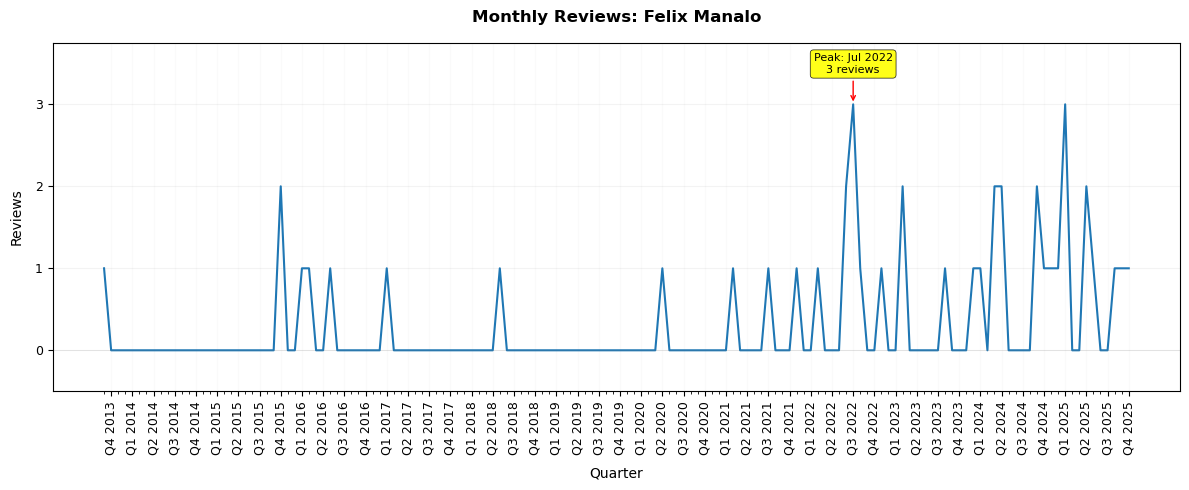


Summary for 'Felix Manalo':
Time period: Sep 2013 to Oct 2025
Total months: 146
Peak month: Jul 2022 with 3 reviews
Total reviews: 43


In [140]:
create_line_graph(felix_manalo_reviews_df, "Felix Manalo")

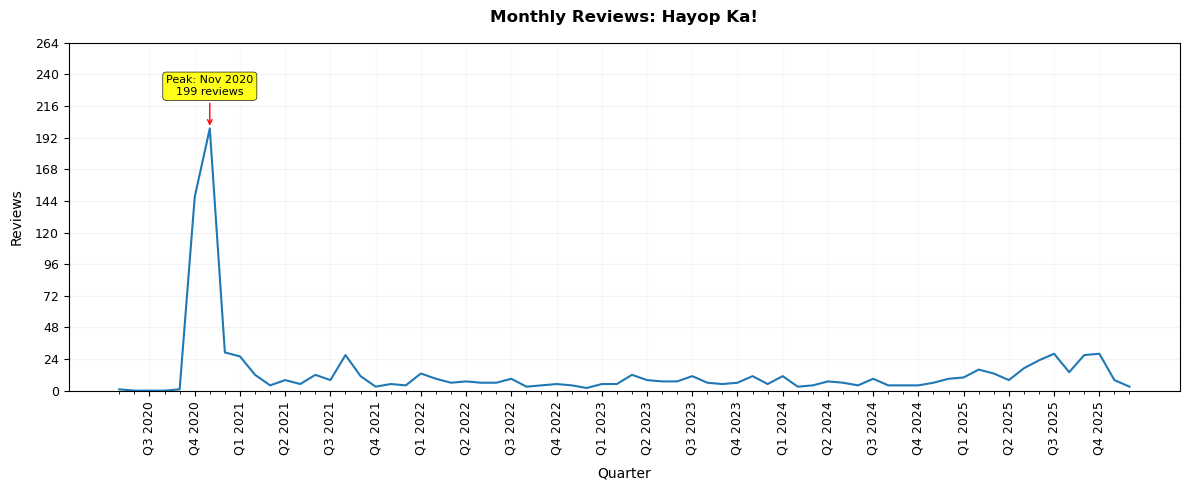


Summary for 'Hayop Ka!':
Time period: May 2020 to Dec 2025
Total months: 68
Peak month: Nov 2020 with 199 reviews
Total reviews: 930


In [141]:
create_line_graph(hayop_ka_reviews_df, "Hayop Ka!")

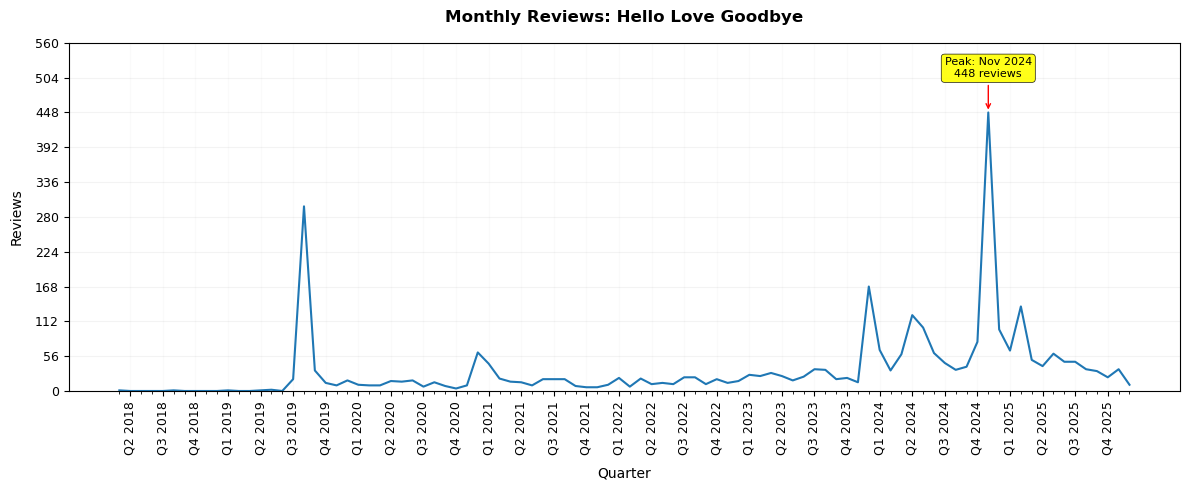


Summary for 'Hello Love Goodbye':
Time period: Mar 2018 to Dec 2025
Total months: 94
Peak month: Nov 2024 with 448 reviews
Total reviews: 3149


In [142]:
create_line_graph(hello_love_goodbye_reviews_df, "Hello Love Goodbye")

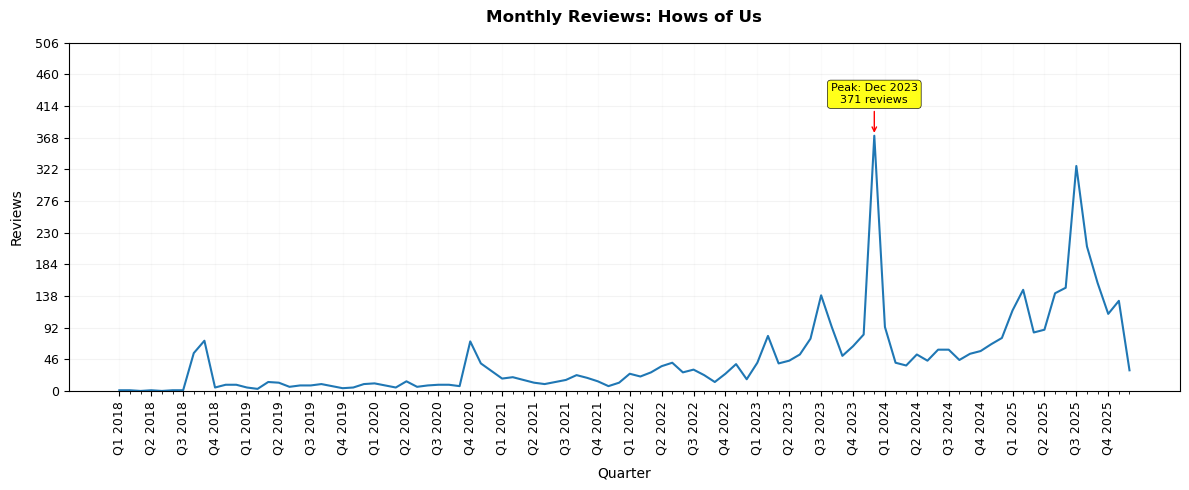


Summary for 'Hows of Us':
Time period: Jan 2018 to Dec 2025
Total months: 96
Peak month: Dec 2023 with 371 reviews
Total reviews: 4492


In [143]:
create_line_graph(hows_of_us_reviews_df, "Hows of Us")

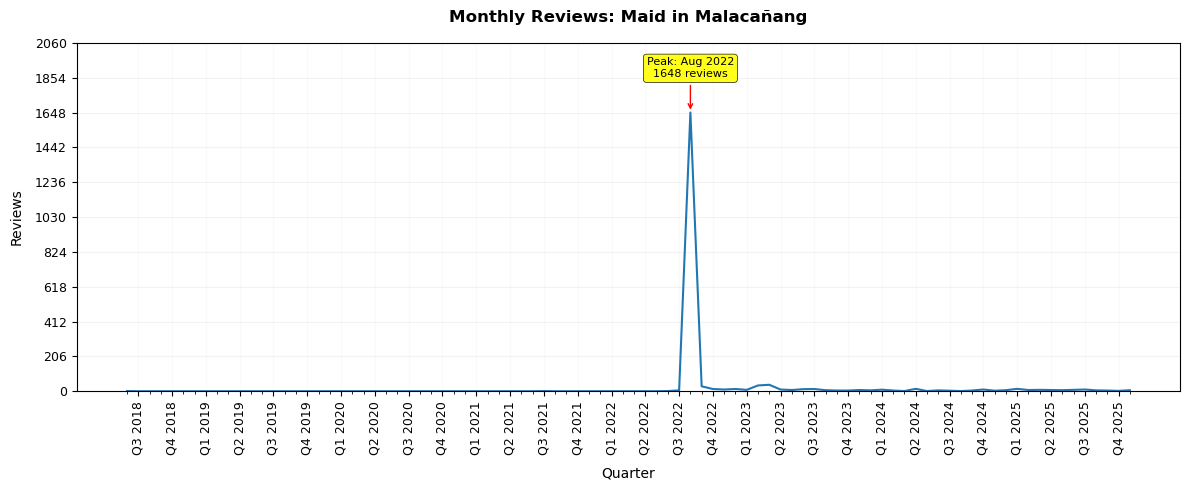


Summary for 'Maid in Malacañang':
Time period: Jun 2018 to Nov 2025
Total months: 90
Peak month: Aug 2022 with 1648 reviews
Total reviews: 2007


In [144]:
create_line_graph(maid_in_malacanang_reviews_df, "Maid in Malacañang")

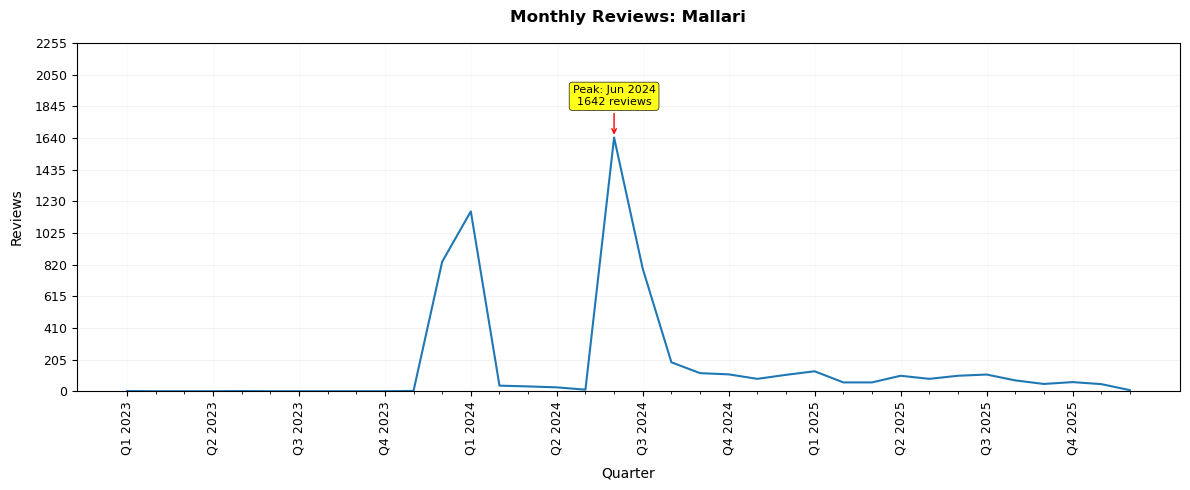


Summary for 'Mallari':
Time period: Jan 2023 to Dec 2025
Total months: 36
Peak month: Jun 2024 with 1642 reviews
Total reviews: 6002


In [145]:
create_line_graph(mallari_reviews_df, "Mallari")

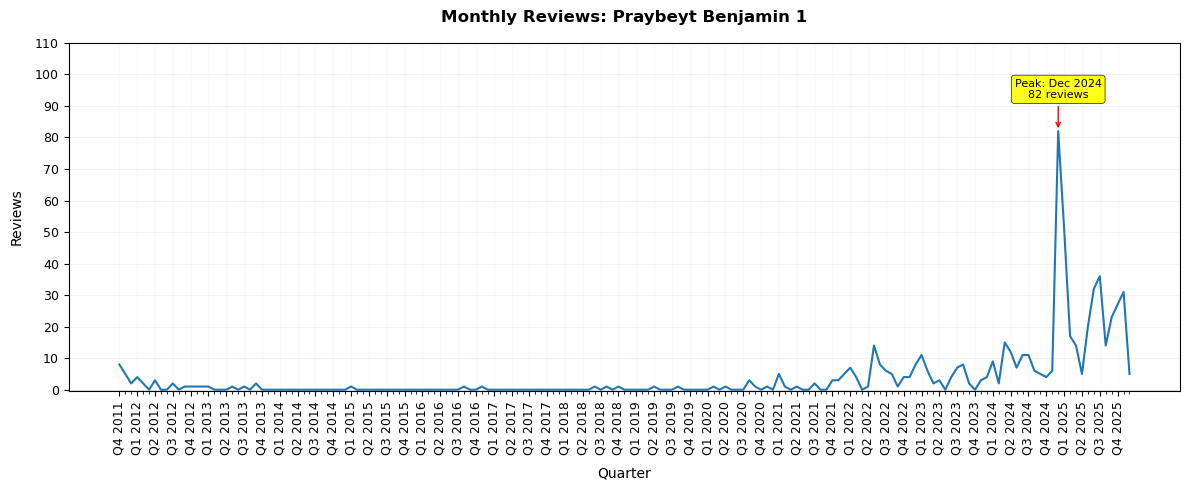


Summary for 'Praybeyt Benjamin 1':
Time period: Oct 2011 to Dec 2025
Total months: 171
Peak month: Dec 2024 with 82 reviews
Total reviews: 627


In [146]:
create_line_graph(praybeyt_benjamin_1_reviews_df, "Praybeyt Benjamin 1")

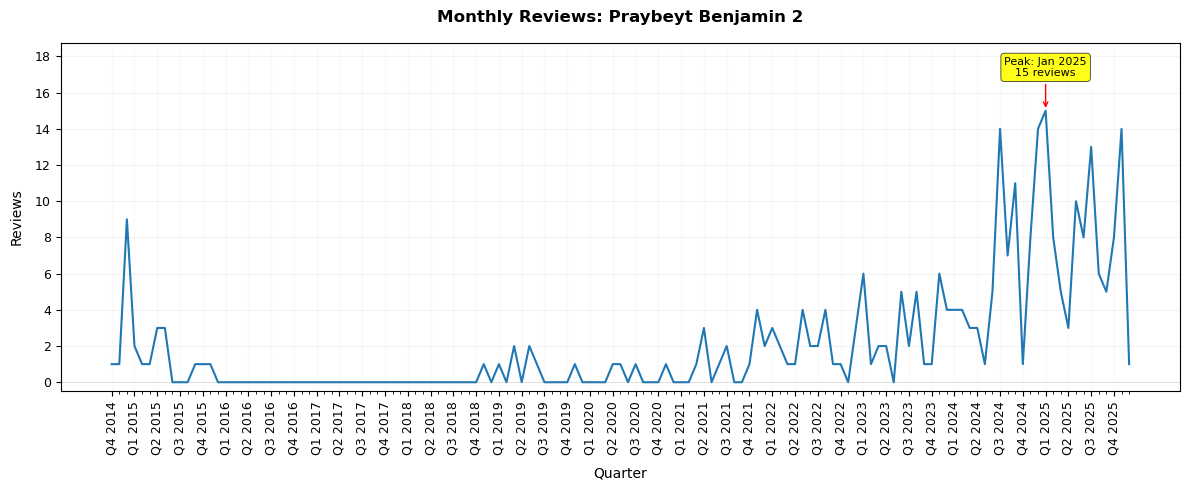


Summary for 'Praybeyt Benjamin 2':
Time period: Oct 2014 to Dec 2025
Total months: 135
Peak month: Jan 2025 with 15 reviews
Total reviews: 280


In [147]:
create_line_graph(praybeyt_benjamin_2_reviews_df, "Praybeyt Benjamin 2")

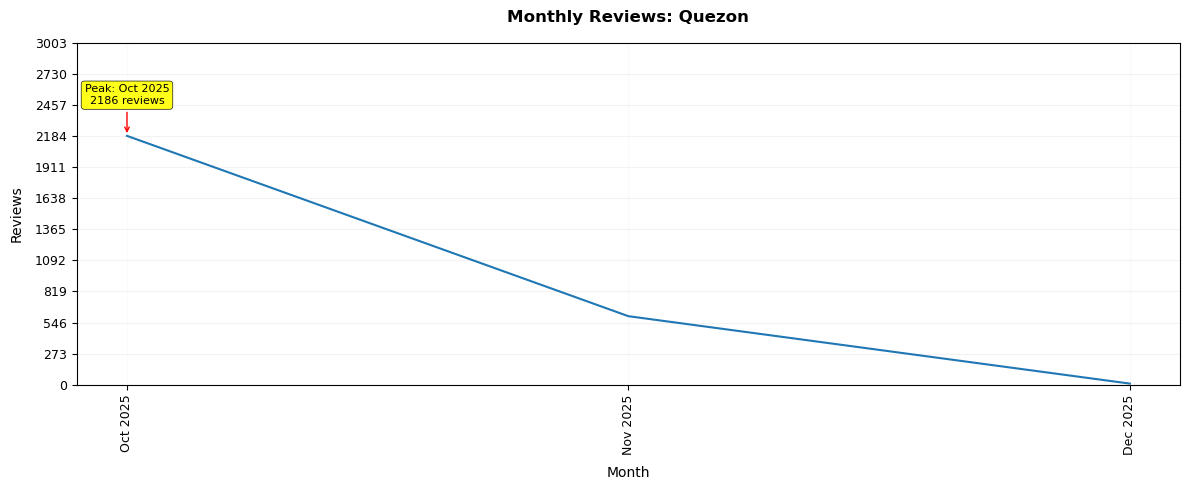


Summary for 'Quezon':
Time period: Oct 2025 to Dec 2025
Total months: 3
Peak month: Oct 2025 with 2186 reviews
Total reviews: 2798


In [148]:
create_line_graph(quezon_reviews_df, "Quezon")

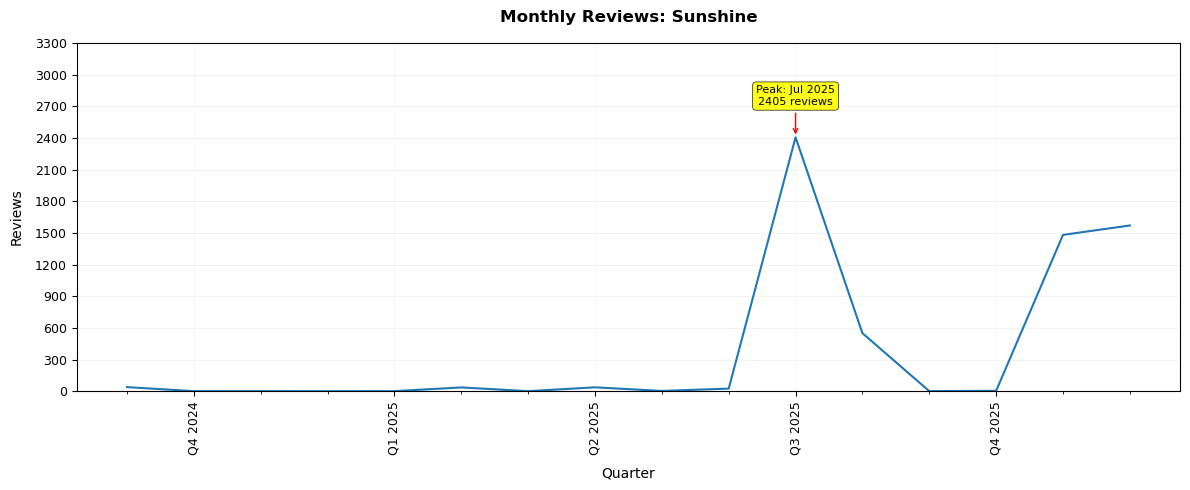


Summary for 'Sunshine':
Time period: Sep 2024 to Dec 2025
Total months: 16
Peak month: Jul 2025 with 2405 reviews
Total reviews: 6155


In [149]:
create_line_graph(sunshine_reviews_df, "Sunshine")

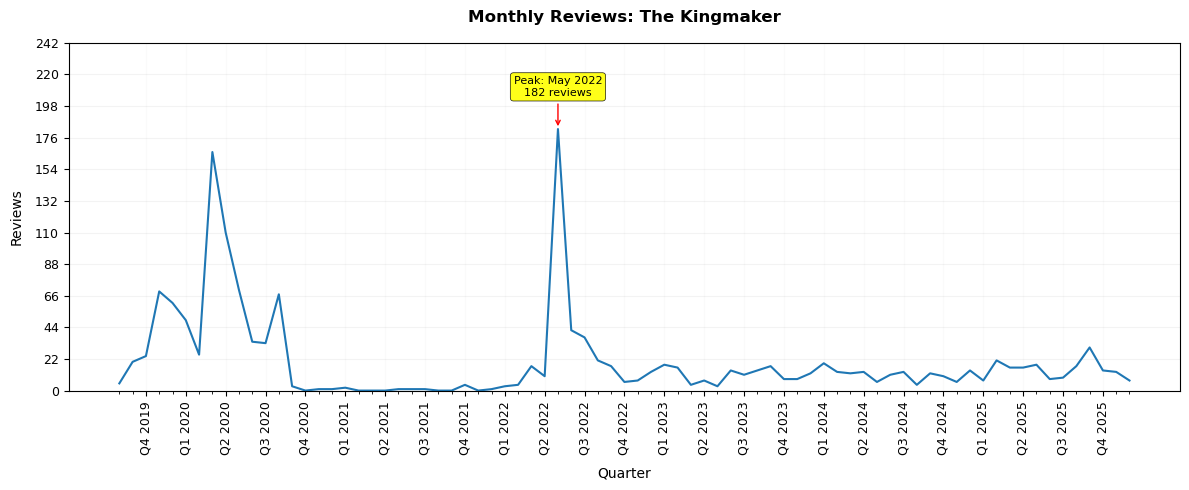


Summary for 'The Kingmaker':
Time period: Aug 2019 to Dec 2025
Total months: 77
Peak month: May 2022 with 182 reviews
Total reviews: 1548


In [150]:
create_line_graph(the_kingmaker_reviews_df, "The Kingmaker")

### Overall Statistics


In [153]:
# Run all checks
print("="*80)
print("COMPLETE SHAPE ANALYSIS")
print("="*80)

# 1. Individual shapes
print("\n1. INDIVIDUAL MOVIE SHAPES:")
for movie_name, reviews_df in all_combined_reviews.items():
    if reviews_df is not None:
        shape_str = f"({reviews_df.shape[0]}, {reviews_df.shape[1]})"
        print(f"  {movie_name:25}: {shape_str}")
        print(f"     Columns: {list(reviews_df.columns)}")
    else:
        print(f"  {movie_name:25}: No reviews (None)")

# 2. Combined shape
print("\n2. COMBINED DATAFRAME:")
all_dfs = [df for df in all_combined_reviews.values() if df is not None]
if all_dfs:
    combined_sample = pd.concat(all_dfs, ignore_index=True)
    print(f"  Total reviews: {combined_sample.shape[0]}")
    print(f"  Total columns: {combined_sample.shape[1]}")
    print(f"  All columns: {list(combined_sample.columns)}")
    
    # Calculate expected from summary
    expected_total = sum(df.shape[0] for df in all_dfs)
    print(f"\n  Expected total (sum of individual): {expected_total}")
    print(f"  Actual combined total: {combined_sample.shape[0]}")
    
    if expected_total == combined_sample.shape[0]:
        print("  ✅ Row counts match!")
    else:
        print("  ⚠️  Row count mismatch - possible duplicate indices")

COMPLETE SHAPE ANALYSIS

1. INDIVIDUAL MOVIE SHAPES:
  The Kingmaker            : (1548, 5)
     Columns: ['username', 'date', 'review_text', 'rating', 'source']
  Praybeyt Benjamin 2      : (280, 5)
     Columns: ['username', 'date', 'review_text', 'rating', 'source']
  Hello Love Goodbye       : (3149, 5)
     Columns: ['username', 'date', 'review_text', 'rating', 'source']
  Hayop Ka                 : (930, 5)
     Columns: ['username', 'date', 'review_text', 'rating', 'source']
  Sunshine                 : (6155, 5)
     Columns: ['username', 'date', 'review_text', 'rating', 'source']
  Quezon                   : (2798, 5)
     Columns: ['username', 'date', 'review_text', 'rating', 'source']
  Praybeyt Benjamin 1      : (627, 5)
     Columns: ['username', 'date', 'review_text', 'rating', 'source']
  Mallari                  : (6002, 5)
     Columns: ['username', 'date', 'review_text', 'rating', 'source']
  Maid in Malacañang       : (2007, 5)
     Columns: ['username', 'date', 'rev